In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import math
from PIL import Image
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy import stats
import sys
#!{sys.executable} -m pip install scikit-bio
import skbio

### Define patients missing samples

In [2]:
no_w2 = ['1769']
no_restim =['1813']
no_s6m = ['1775', '1782']
no_6m = ['1775', '1790']
no_d28 = ['1802']

### Define functions

In [4]:
def make_factor_nt(df, type_df_file):
    df['factor'] = df['cdr3nt'].map(str) + '|' + df['v'].map(str) + '|' + df['j'].map(str)
    if (type_df_file == 'm6')|(type_df_file == 's6m'):
        df['freq_'+type_df_file] = df['freq']
        df = df.loc[:,['factor', 'freq_'+type_df_file]]
    elif type_df_file == 'enr':
        df = df.loc[:,['factor', 'count','freq','cdr3aa','d','VEnd','DStart','DEnd','JStart']]
    return(df)

def return_columns_from_factor(df):
    splited = df['factor'].str.split('|')
    df['cdr3nt'] = splited.str.get(0)
    df['v'] = splited.str.get(1)
    df['j'] = splited.str.get(2)
    df = df.loc[:,['count','freq','cdr3nt','cdr3aa','v','d','j','VEnd','DStart','DEnd','JStart']]
    return(df)

In [ ]:
#Intersection by cdr3nt
empty_df = pd.DataFrame(columns=['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j', 'VEnd', 'DStart',
       'DEnd', 'JStart'])
patients = ['1810', '1753','1802','1776','1780','1800','1792',
            '1771','1765','1752','1757','1813','1769','1787','1775','1782','1790']#
patients_no_change = ['1775','1782','1790']
#patients = ['1753']
summary_no_s6m = pd.DataFrame()
for patient in patients:
    path_to_res_well1 = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_wells/p'+patient+'/well_1_6m_used/'
    path_to_res_well2 = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_wells/p'+patient+'/well_2_6m_used/'
    os.makedirs(path_to_res_well1, exist_ok = True)
    os.makedirs(path_to_res_well2, exist_ok = True)
    
    path_to_res_cd4 = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd4_6m_used/'
    path_to_res_cd8 = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd8_6m_used/'
    os.makedirs(path_to_res_cd4, exist_ok = True)
    os.makedirs(path_to_res_cd8, exist_ok = True)
    
    w1_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_wells/p'+patient+'/well_1_10e-8_5x/_cdr3nt_1e-05_5.enr.vdj.txt'
    w1_enr = pd.read_csv(w1_enr_path, delimiter='\t')
    w1_enr = make_factor_nt(w1_enr, 'enr')
    
    if patient in no_w2:
        w2_enr = empty_df
    else:
        w2_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_wells/p'+patient+'/well_2_10e-8_5x/_cdr3nt_1e-05_5.enr.vdj.txt'
        w2_enr = pd.read_csv(w2_enr_path, delimiter='\t')
    w2_enr = make_factor_nt(w2_enr, 'enr')
    
    cd4_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd4_thd_3_kneg/_cdr3nt_0_3.enr.vdj.txt'
    cd4_enr = pd.read_csv(cd4_enr_path, delimiter='\t')
    cd4_enr = make_factor_nt(cd4_enr, 'enr')
    
    cd8_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd8_thd_3_kneg/_cdr3nt_0_3.enr.vdj.txt'
    cd8_enr = pd.read_csv(cd8_enr_path, delimiter='\t')
    cd8_enr = make_factor_nt(cd8_enr, 'enr')
    
    if patient in patients_no_change:
        w1_enr = return_columns_from_factor(w1_enr)
        w2_enr = return_columns_from_factor(w2_enr)
        cd4_enr = return_columns_from_factor(cd4_enr)
        cd8_enr = return_columns_from_factor(cd8_enr)

        w1_enr.to_csv(path_to_res_well1+'cdr3.enr.vdj.txt', sep='\t', index=False)
        w2_enr.to_csv(path_to_res_well2+'cdr3.enr.vdj.txt', sep='\t', index=False)
        cd4_enr.to_csv(path_to_res_cd4+'cdr3.enr.vdj.txt', sep='\t', index=False)
        cd8_enr.to_csv(path_to_res_cd8+'cdr3.enr.vdj.txt', sep='\t', index=False)
        
        new_row_sum = {
            'patient':patient, 'type':'6m_not_used',
            'n_cd4_enr_all':len(cd4_enr),'n_cd8_enr_all':len(cd8_enr),
            'n_w1_enr_all':len(w1_enr),'n_w2_enr_all':len(w2_enr),

            'n_cd4_enr_good':len(cd4_enr),'n_cd8_enr_good':len(cd8_enr),
            'n_w1_enr_good':len(w1_enr),'n_w2_enr_good':len(w2_enr)
        }

        summary_no_s6m = summary_no_s6m.append(new_row_sum,ignore_index=True)
    else:
        s6m_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/6M_spike/nc.vdj.p'+patient+'_Spike_exp_6M_clonotypes.txt'
        s6m = pd.read_csv(s6m_path, delimiter='\t')
        s6m = make_factor_nt(s6m, 's6m')

        m6_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+patient+'_total_PBMC_6M_clonotypes.txt'
        m6 = pd.read_csv(m6_path, delimiter='\t')
        m6 = make_factor_nt(m6, 'm6')

        w1_enr_6m = w1_enr.merge(m6, how='left', on=['factor']).merge(s6m, how='left', on=['factor']).fillna(0)
        w2_enr_6m = w2_enr.merge(m6, how='left', on=['factor']).merge(s6m, how='left', on=['factor']).fillna(0)
        cd4_enr_6m = cd4_enr.merge(m6, how='left', on=['factor']).merge(s6m, how='left', on=['factor']).fillna(0)
        cd8_enr_6m = cd8_enr.merge(m6, how='left', on=['factor']).merge(s6m, how='left', on=['factor']).fillna(0)

        w1_enr_6m_good = w1_enr_6m[(w1_enr_6m['freq_s6m']>(w1_enr_6m['freq_m6']*20))|((w1_enr_6m['freq_s6m']==0)&(w1_enr_6m['freq_m6']==0))]
        w2_enr_6m_good = w2_enr_6m[(w2_enr_6m['freq_s6m']>(w2_enr_6m['freq_m6']*20))|((w2_enr_6m['freq_s6m']==0)&(w2_enr_6m['freq_m6']==0))]
        cd4_enr_6m_good = cd4_enr_6m[(cd4_enr_6m['freq_s6m']>(cd4_enr_6m['freq_m6']*20))|((cd4_enr_6m['freq_s6m']==0)&(cd4_enr_6m['freq_m6']==0))]
        cd8_enr_6m_good = cd8_enr_6m[(cd8_enr_6m['freq_s6m']>(cd8_enr_6m['freq_m6']*20))|((cd8_enr_6m['freq_s6m']==0)&(cd8_enr_6m['freq_m6']==0))]

        w1_enr_6m_good_vdj = return_columns_from_factor(w1_enr_6m_good)
        w2_enr_6m_good = return_columns_from_factor(w2_enr_6m_good)
        cd4_enr_6m_good = return_columns_from_factor(cd4_enr_6m_good)
        cd8_enr_6m_good = return_columns_from_factor(cd8_enr_6m_good)

        w1_enr_6m_good.to_csv(path_to_res_well1+'cdr3.enr.vdj.txt', sep='\t', index=False)
        w2_enr_6m_good.to_csv(path_to_res_well2+'cdr3.enr.vdj.txt', sep='\t', index=False)
        cd4_enr_6m_good.to_csv(path_to_res_cd4+'cdr3.enr.vdj.txt', sep='\t', index=False)
        cd8_enr_6m_good.to_csv(path_to_res_cd8+'cdr3.enr.vdj.txt', sep='\t', index=False)

        new_row_sum = {
            'patient':patient,'type':'used_6m_info',
            'n_cd4_enr_all':len(cd4_enr),'n_cd8_enr_all':len(cd8_enr),
            'n_w1_enr_all':len(w1_enr),'n_w2_enr_all':len(w2_enr),

            'n_cd4_enr_good':len(cd4_enr_6m_good),'n_cd8_enr_good':len(cd8_enr_6m_good),
            'n_w1_enr_good':len(w1_enr_6m_good),'n_w2_enr_good':len(w2_enr_6m_good)
        }

        summary_no_s6m = summary_no_s6m.append(new_row_sum,ignore_index=True)
    
summary_no_s6m = summary_no_s6m.loc[:,['patient','type',
        'n_cd4_enr_all','n_cd4_enr_good',
        'n_cd8_enr_all','n_cd8_enr_good',
        'n_w1_enr_all','n_w1_enr_good',
        'n_w2_enr_all','n_w2_enr_good']]
    
summary_no_s6m.to_csv('/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/enriched_wells_cd_6m_used.txt', sep='\t', index=True)
#summary_no_s6m_test = pd.read_csv('/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/final_results/enriched_wells_cd_6m_used.txt', delimiter='\t')
#summary_no_s6m_new = pd.read_csv('/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/enriched_wells_cd_6m_used.txt', delimiter='\t')
#summary_no_s6m_test==summary_no_s6m_new

## Fig 2A (stucked bar plot)

### Define functions

In [24]:
def freqs_or_lens_to_summary(dict_freqs_for_sum, patient, summary):
    for x in list(dict_freqs_for_sum.keys()):
        dict_freqs_for_sum[x]['patient'] = patient
        dict_freqs_for_sum[x]['type'] = x
        summary = summary.append(dict_freqs_for_sum[x], ignore_index=True)
    return(summary)
def make_factor(df,col_type):
    df['factor'] = df['cdr3nt'].map(str) + '|' + df['v'].map(str) + '|' + df['j'].map(str)
    df = df[['factor']]
    df['type_'+col_type] = col_type
    return df
def combine_types_new_combined(intersect_df, list_types, type_patient='None'):
    intersect_df['type'] = intersect_df['type_'+list_types[0]].fillna('').map(str) + '&' + intersect_df['type_'+list_types[1]].fillna('').map(str)
    for x in range(2, len(list_types)):
        intersect_df['type'] = intersect_df['type'].fillna('').map(str) + '&' + intersect_df['type_'+list_types[x]].fillna('').map(str)
    intersect_df['type'].replace(r'^\&+', '', regex=True, inplace=True)
    intersect_df['type'].replace(r'\&+\Z', '', regex=True, inplace=True)     
    intersect_df['type'].replace(r'\&+', '&', regex=True, inplace=True)
    if type_patient == 'None':
        intersect_df.loc[(intersect_df['type']!='d0&d14&d28&m6')&(intersect_df['type']!='d14&d28')&(intersect_df['type']!='d14&d28&m6')&(intersect_df['type']!='d14')&(intersect_df['type']!='d28&m6')&(intersect_df['type']!='d14&m6')&(intersect_df['type']!='d28'), 'type'] = 'other'
    elif type_patient == 'no_d28':
        intersect_df.loc[(intersect_df['type']!='d0&d14&m6')&(intersect_df['type']!='d14&m6')&(intersect_df['type']!='d14'), 'type'] = 'other'
    elif type_patient == 'no_6m':
        intersect_df.loc[(intersect_df['type']!='d0&d14&d28')&(intersect_df['type']!='d14&d28')&(intersect_df['type']!='d14')&(intersect_df['type']!='d28'), 'type'] = 'other'
    
    return intersect_df
def intresect_clones_nt_new_combined(dict_dfs,type_patient):#d0, d14, d28, m6, w1, w2, w1_enr, w2_enr, restim, cd4, cd8, cd4_enr, cd8_enr, sm6):
    types = list(dict_dfs.keys())
    for df_name in dict_dfs.keys():
        dict_dfs[df_name] = make_factor(dict_dfs[df_name], df_name)
    intersect = dict_dfs[types[0]].merge(dict_dfs[types[1]], how='outer', on='factor')
    for df_name in types[2:]:
        intersect = intersect.merge(dict_dfs[df_name], how='outer', on='factor')

    intersect = combine_types_new_combined(intersect, types,type_patient)
    intersect = intersect[['factor', 'type']]
    return(intersect)
def make_factor_to_plot_column(df):
    df['factor'] = df['cdr3nt'].map(str) + '|' + df['v'].map(str) + '|' + df['j'].map(str)
    df = df[['factor', 'freq', 'count']]
    return df


def freq_for_plots_new_combined(df, col_type, type_patient='None'):
    if type_patient == 'None':
        df_and_intersect_bad = df.loc[(df['type']=='d0&d14&d28&m6')|(df['type']=='other'), 'freq'].sum()
        df_and_intersect_good = df.loc[(df['type']=='d14&d28')|(df['type']=='d14&d28&m6')|(df['type']=='d14')|(df['type']=='d28&m6')|(df['type']=='d14&m6')|(df['type']=='d28'), 'freq'].sum()
        df_and_intersect_unique = df.loc[(df['type']==col_type), 'freq'].sum()
        dict_freq = {'bad': df_and_intersect_bad, 'good': df_and_intersect_good, 
                     'unique': df_and_intersect_unique}
    elif type_patient == 'no_d28':
        df_and_intersect_bad = df.loc[(df['type']=='d0&d14&m6')|(df['type']=='other'), 'freq'].sum()
        df_and_intersect_good = df.loc[(df['type']=='d14&m6')|(df['type']=='d14'), 'freq'].sum()
        df_and_intersect_unique = df.loc[(df['type']==col_type), 'freq'].sum()
        dict_freq = {'bad': df_and_intersect_bad, 
                     'good': df_and_intersect_good, 
                     'unique': df_and_intersect_unique}
    elif type_patient == 'no_6m':
        df_and_intersect_bad = df.loc[(df['type']=='d0&d14&d28')|(df['type']=='other'), 'freq'].sum()
        df_and_intersect_good = df.loc[(df['type']=='d14&d28')|(df['type']=='d14')|(df['type']=='d28'), 'freq'].sum()
        df_and_intersect_unique = df.loc[(df['type']==col_type), 'freq'].sum()
        dict_freq = {'bad': df_and_intersect_bad, 
                     'good': df_and_intersect_good, 
                     'unique': df_and_intersect_unique}
    return(dict_freq)
def count_for_plots_new_combined(df, col_type, type_patient='None'):
    if type_patient == 'None':
        df_and_intersect_bad = len(df[(df['type']=='d0&d14&d28&m6')|(df['type']=='other')])
        df_and_intersect_good = len(df[(df['type']=='d14&d28')|(df['type']=='d14&d28&m6')|(df['type']=='d14')|(df['type']=='d28&m6')|(df['type']=='d14&m6')|(df['type']=='d28')])
        df_and_intersect_unique = len(df[df['type']==col_type])
        dict_count = {'bad': df_and_intersect_bad,  
                     'good': df_and_intersect_good, 
                     'unique': df_and_intersect_unique}
    elif type_patient == 'no_d28':
        df_and_intersect_bad = len(df[(df['type']=='d0&d14&m6')|(df['type']=='other')])
        df_and_intersect_good = len(df[(df['type']=='d14&m6')|(df['type']=='d14')])
        df_and_intersect_unique = len(df[df['type']==col_type])
        dict_count = {'bad': df_and_intersect_bad, 
                     'good': df_and_intersect_good, 
                     'unique': df_and_intersect_unique}
    elif type_patient == 'no_6m':
        df_and_intersect_bad = len(df[(df['type']=='d0&d14&d28')|(df['type']=='other')])
        df_and_intersect_good = len(df[(df['type']=='d14&d28')|(df['type']=='d14')|(df['type']=='d28')])
        df_and_intersect_unique = len(df[df['type']==col_type])
        dict_count = {'bad': df_and_intersect_bad, 
                     'good': df_and_intersect_good, 'unique': df_and_intersect_unique}
    
    return(dict_count)

/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0.9999999999999971 0.9999999999999967 0.9999999999999996 0.9999999999999989 0.9999999999999974 0.9999999999999996 0.9999999999999988 1.0 0.9999999999999991 0.9999999999999984
0.9999999999999922 0.9999999999999911 0.9999999999999999 1.0000000000000002 0.9999999999999993 0.9999999999999908 1.0 1.0000000000000004 0.9999999999999928 0.9999999999999978
0.9999999999999913 0.9999999999999911 0.9999999999999998 1.0000000000000007 0.9999999999999907 0.999999999999996 1.0000000000000016 0.9999999999999998 0.9999999999999922 0
0.9999999999999879 0.9999999999999885 1.0000000000000013 0.9999999999999999 0.9999999999999905 0.9999999999999916 0.9999999999999978 0.9999999999999982 0.9999999999999908 0.9999999999999947
0.9999999999999891 0.9999999999999883 0.9999999999999996 0.9999999999999989 0.9999999999999895 0.999999999999996 1.000000000000003 1.0 0.9999999999999902 0.9999999999999969
0.9999999999999888 0.999999999999988 0.9999999999999998 0.9999999999999987 0.9999999999999888 0.9999999999999984 0.

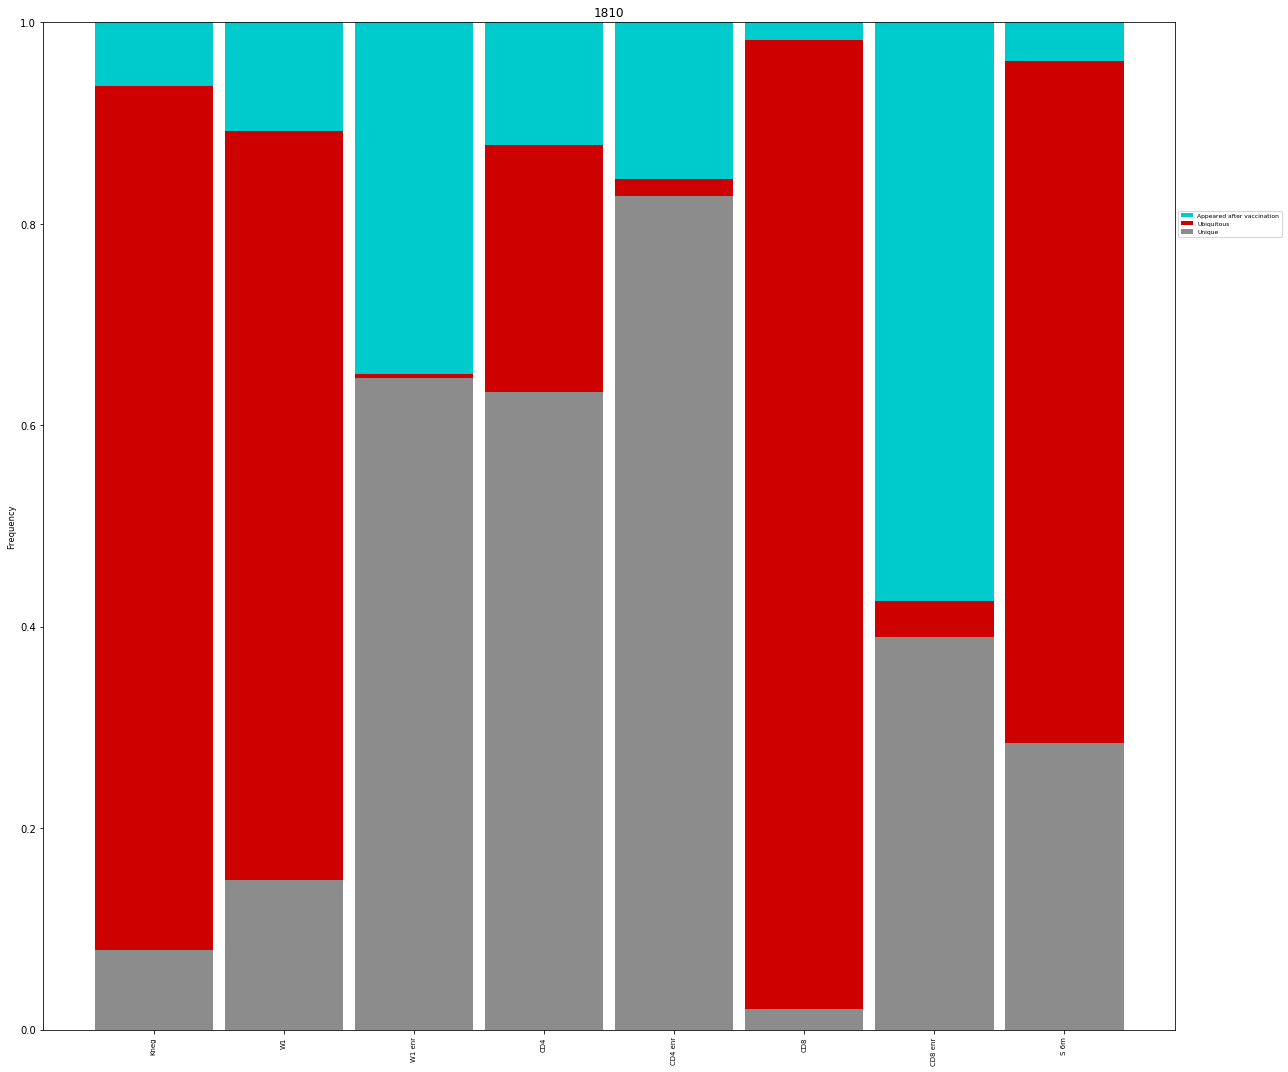

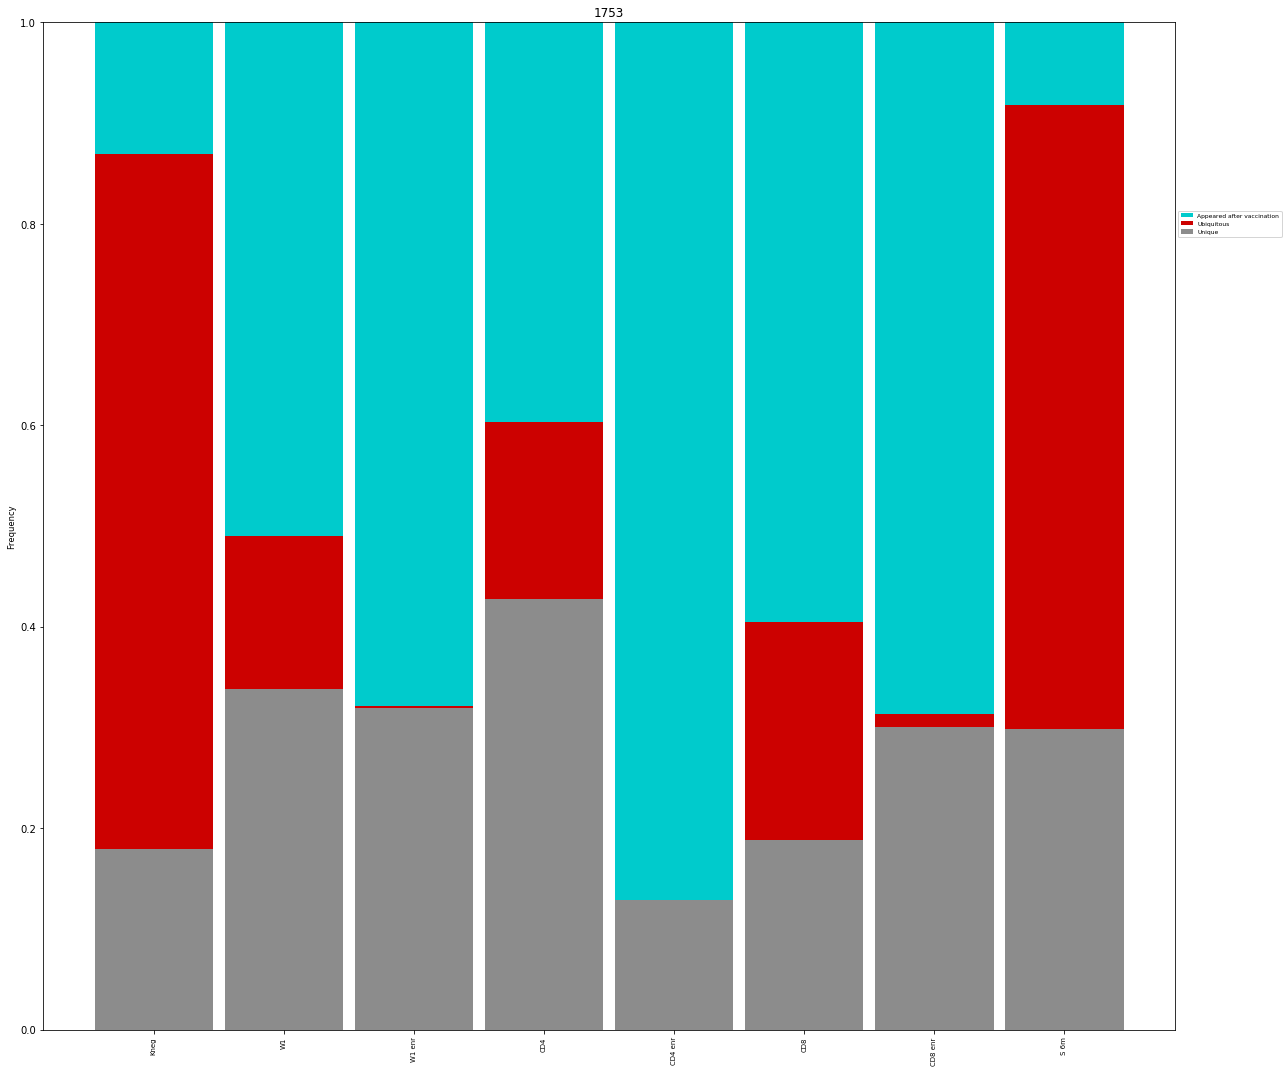

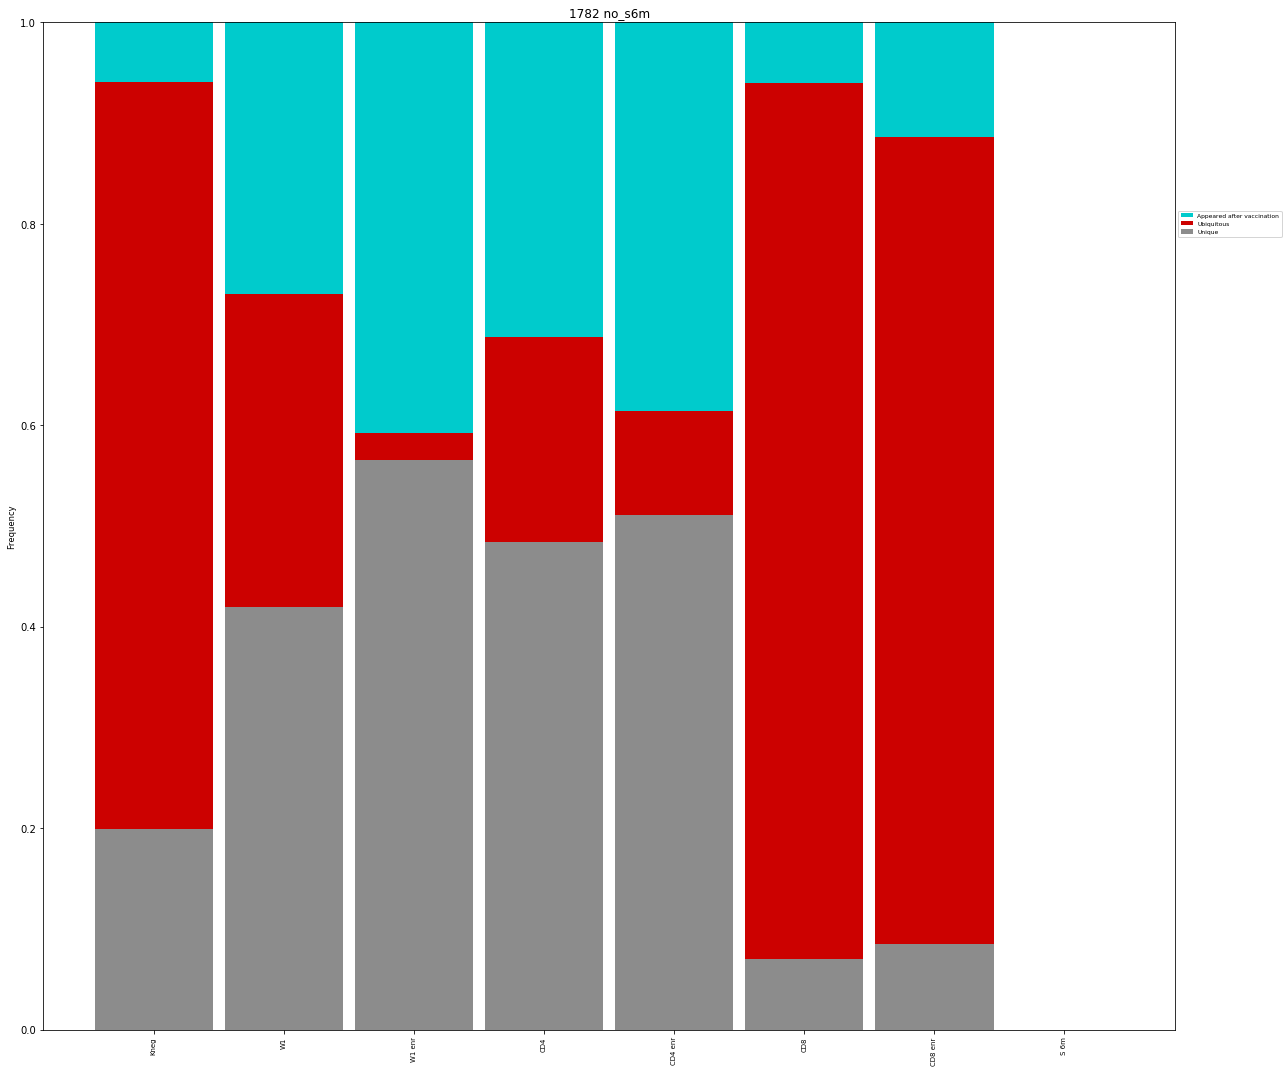

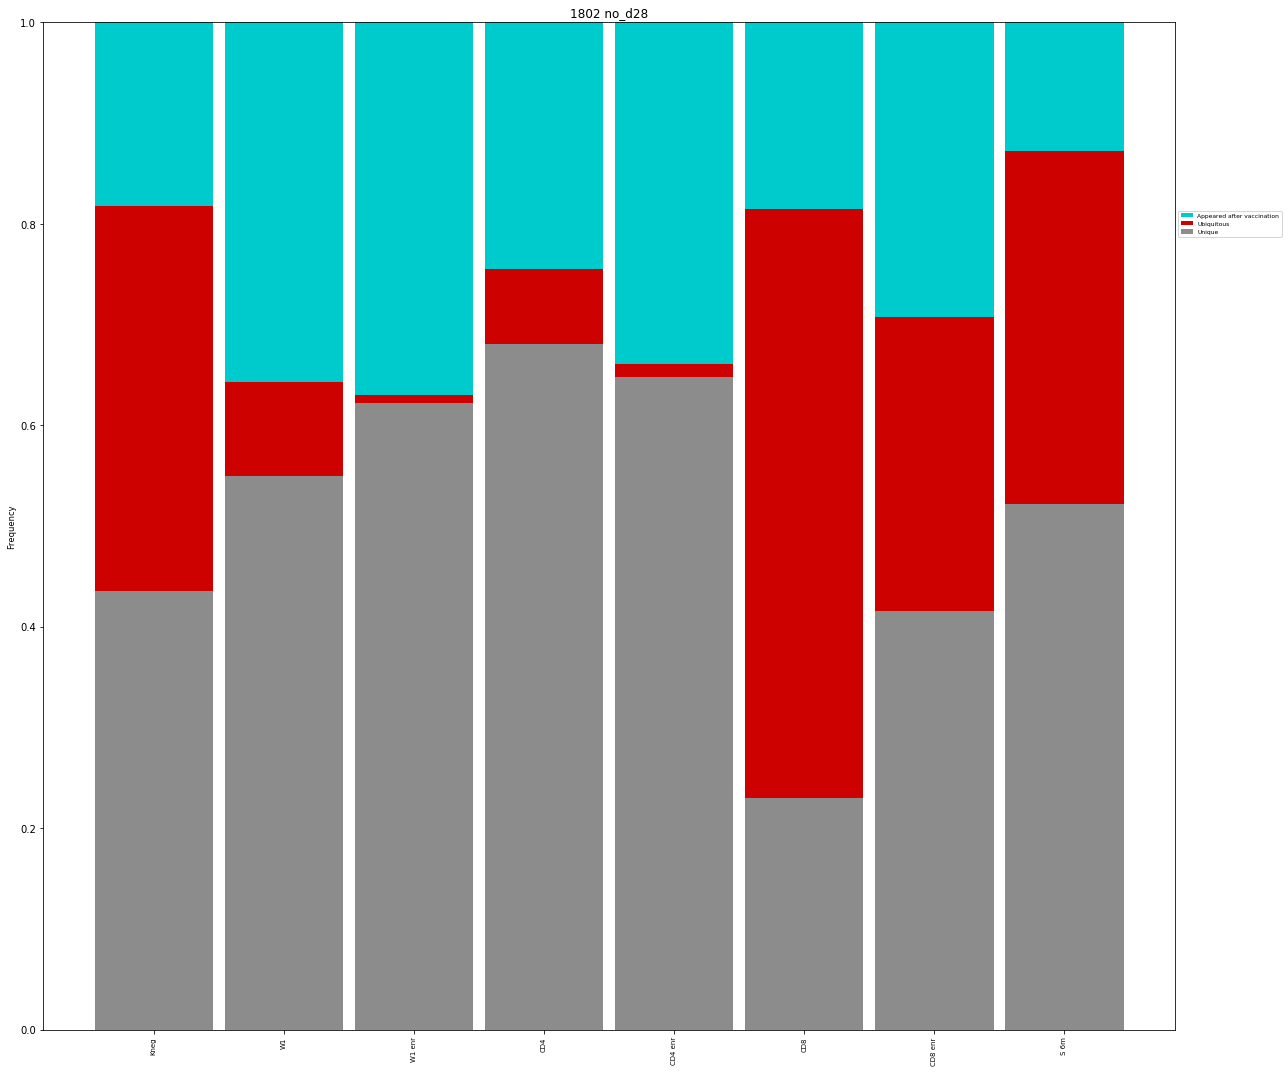

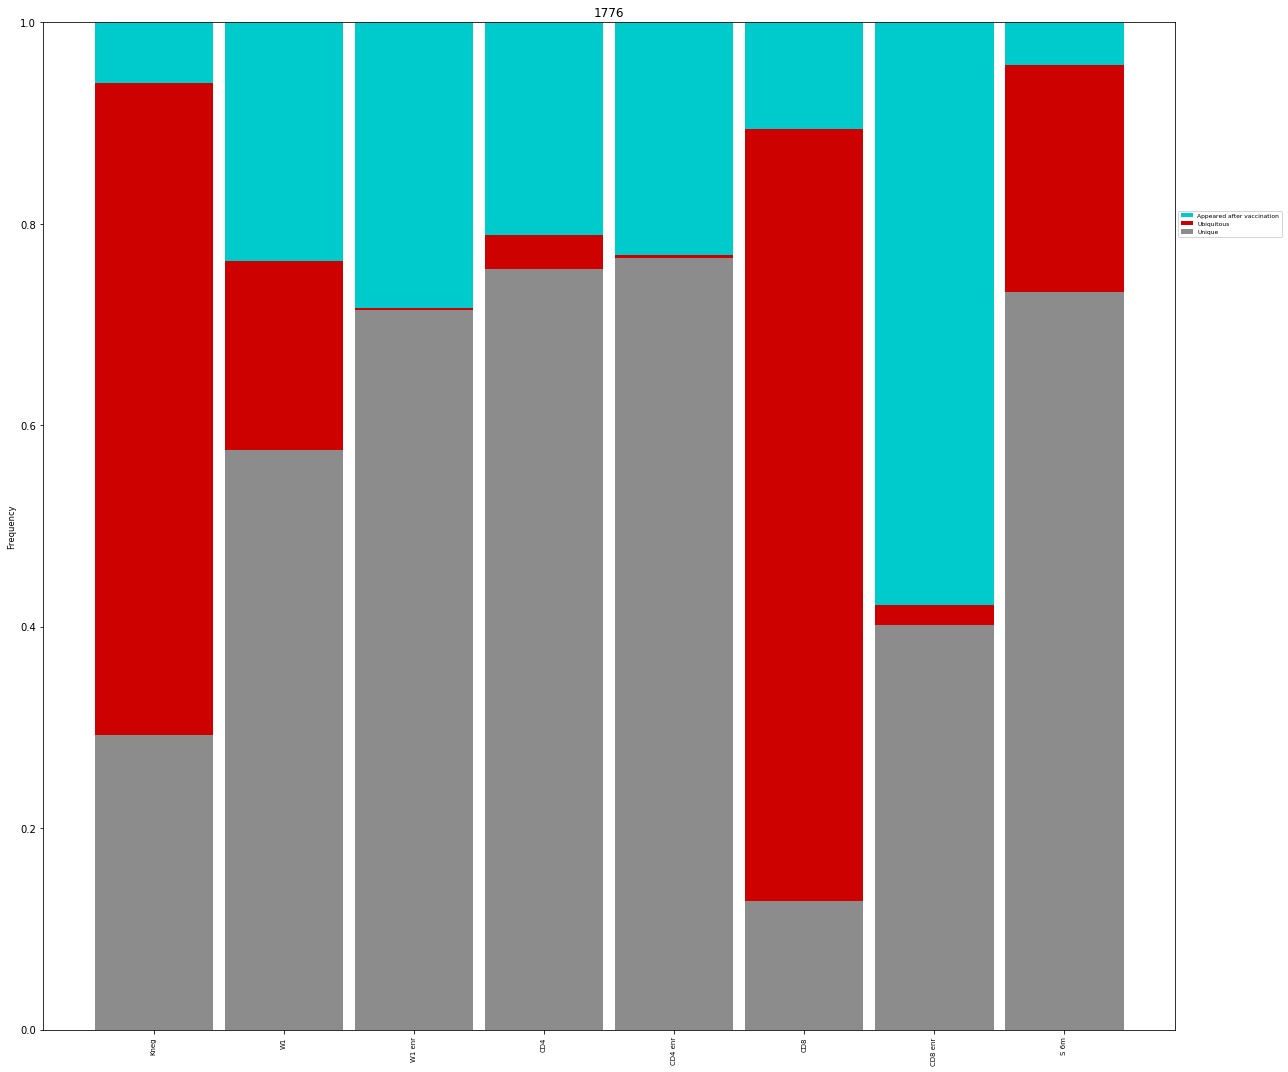

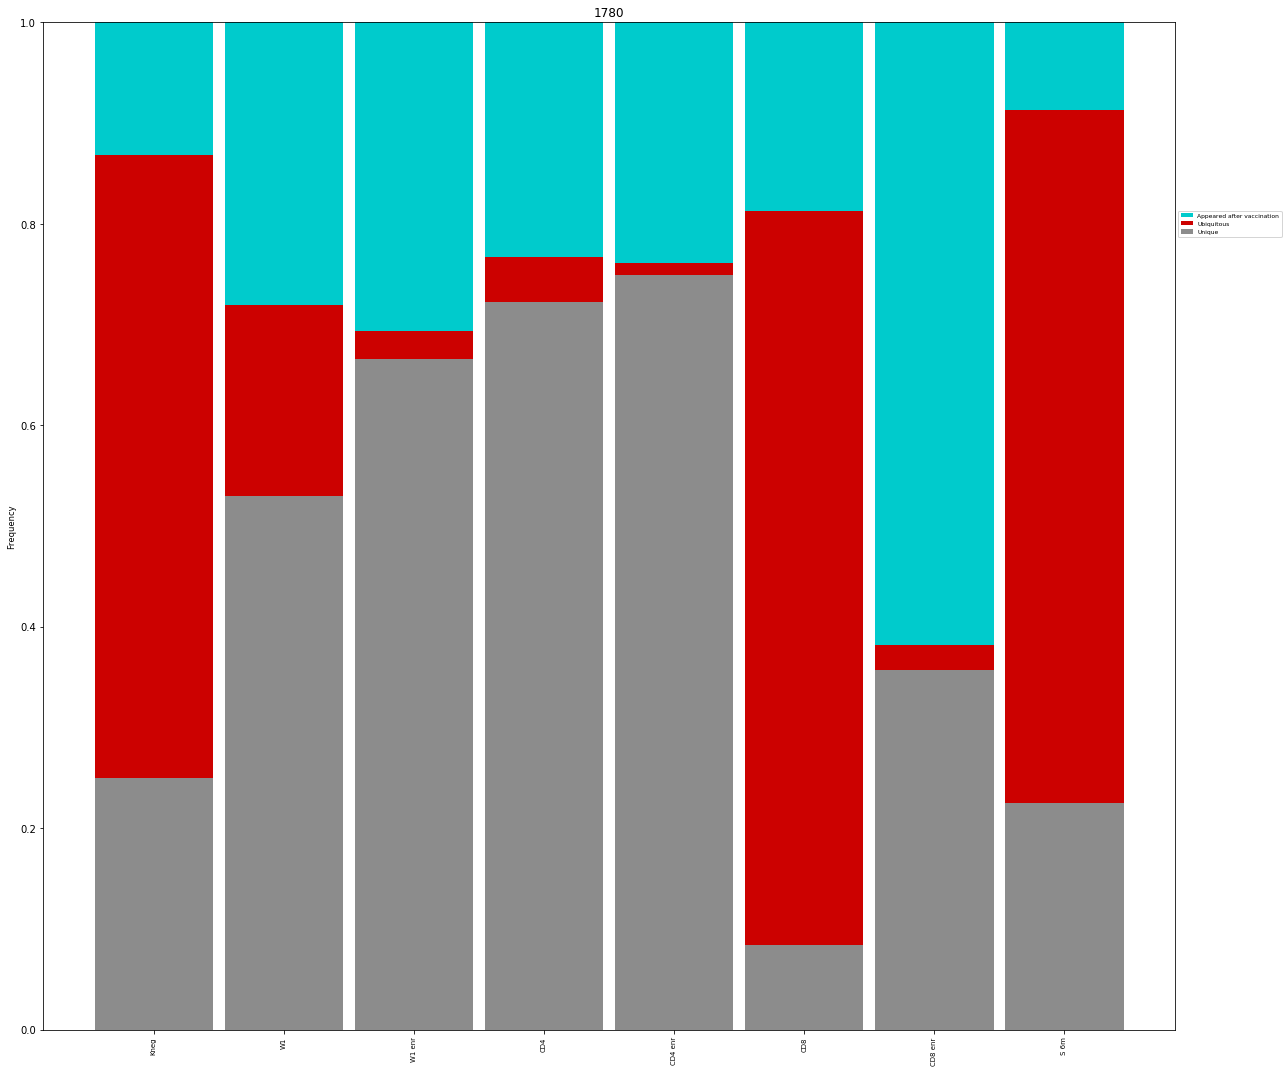

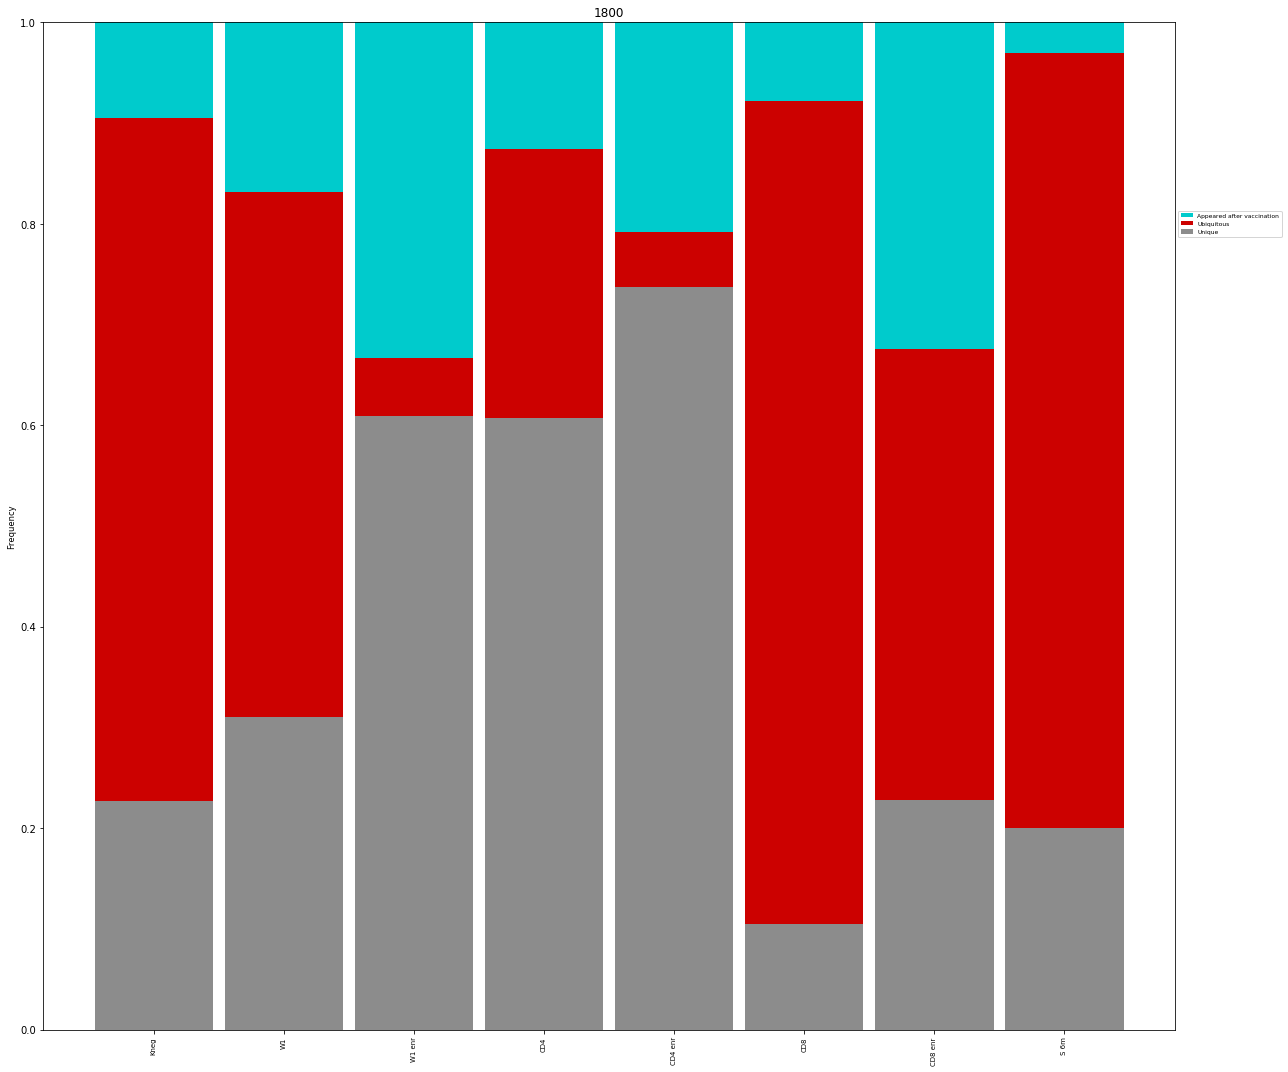

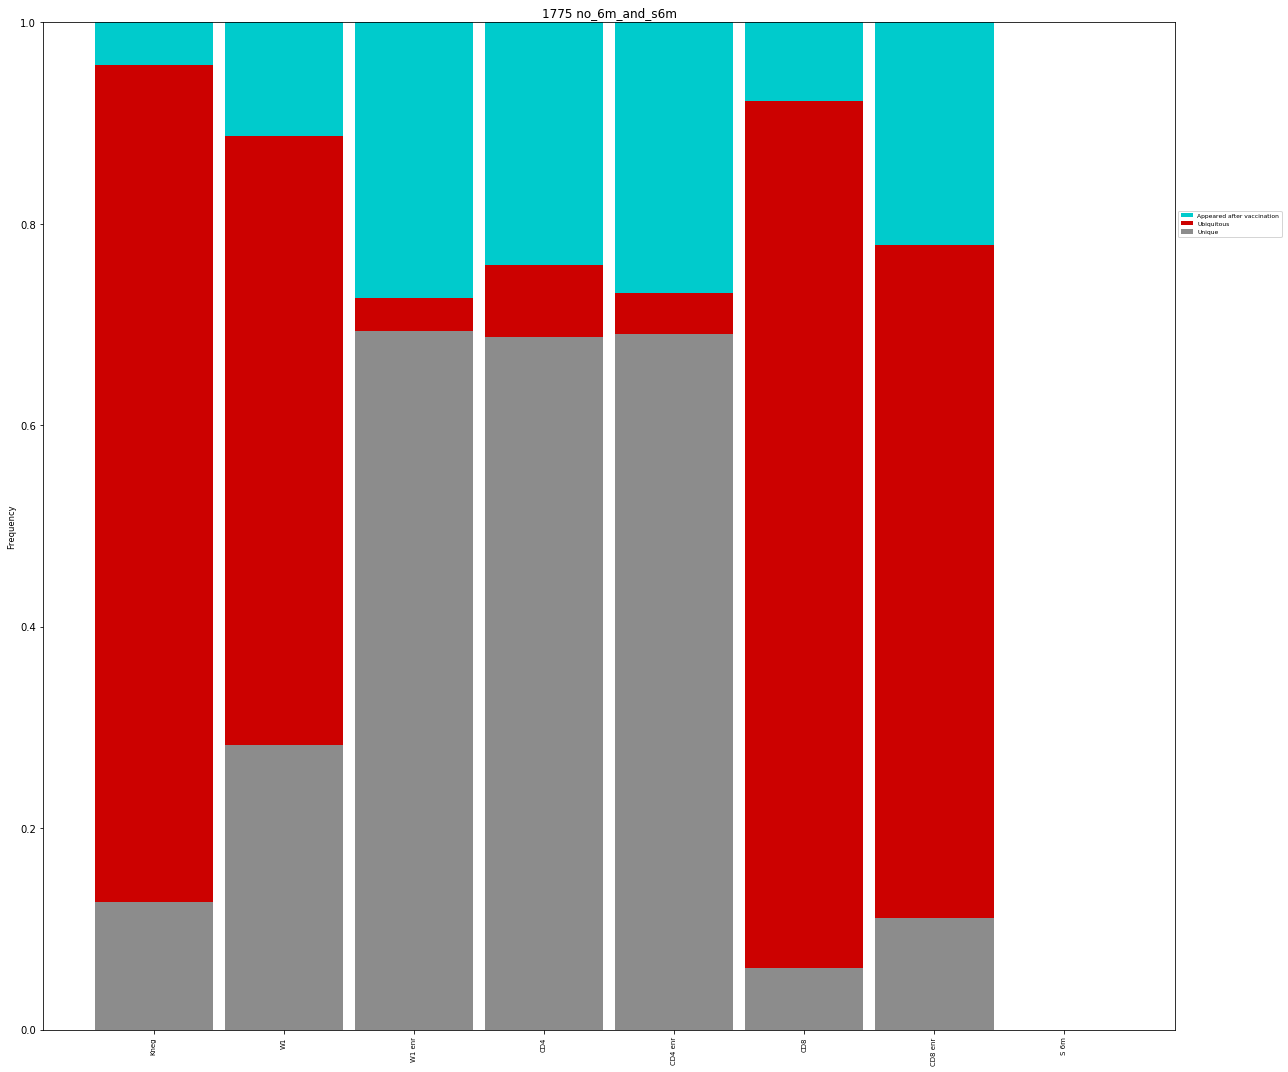

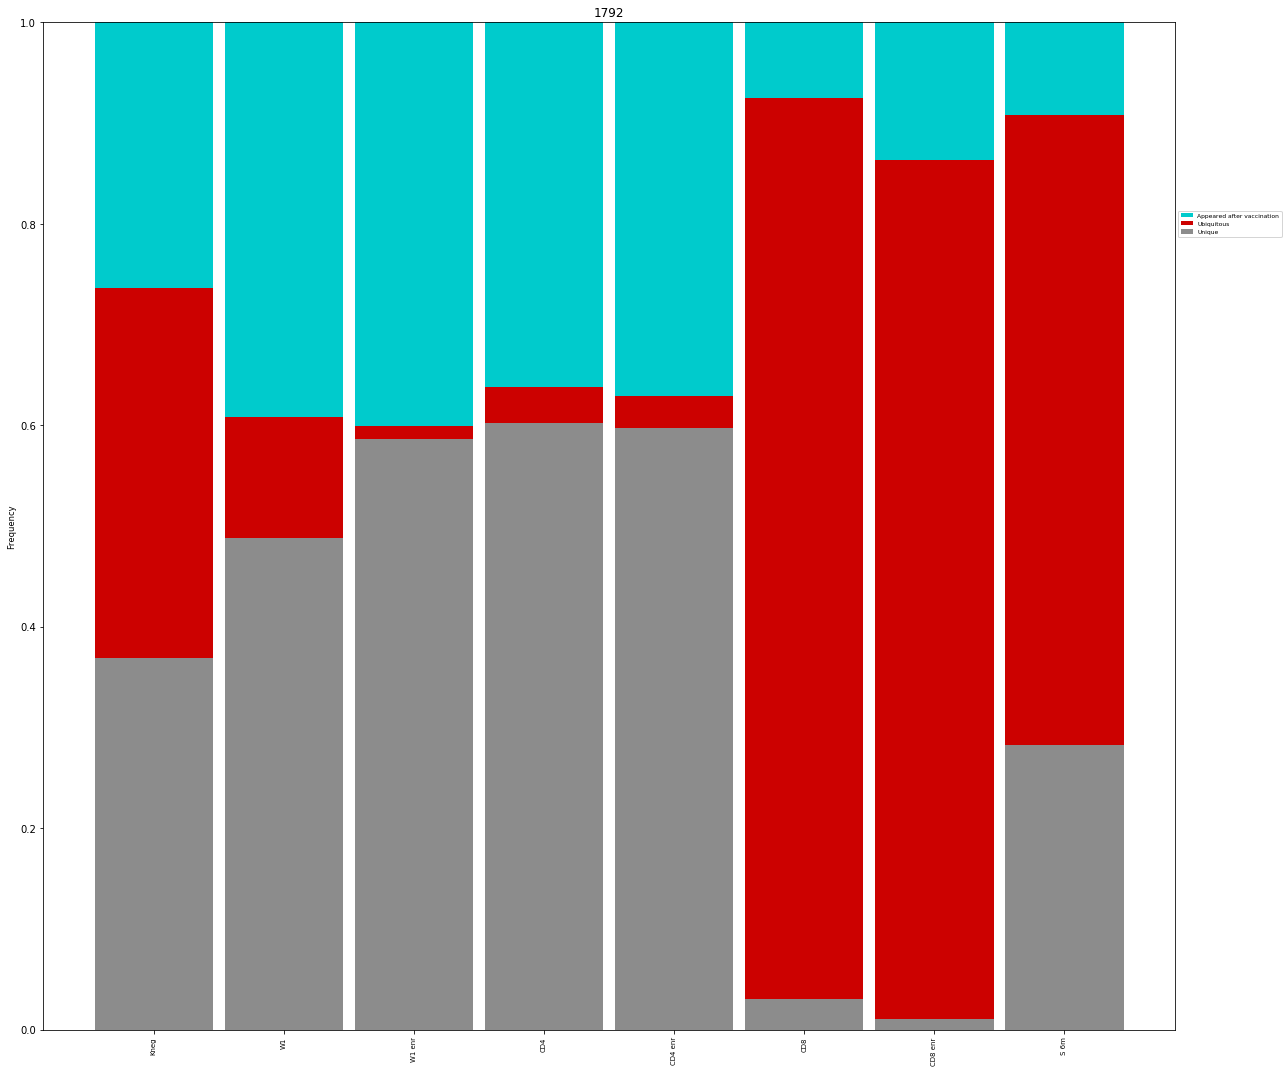

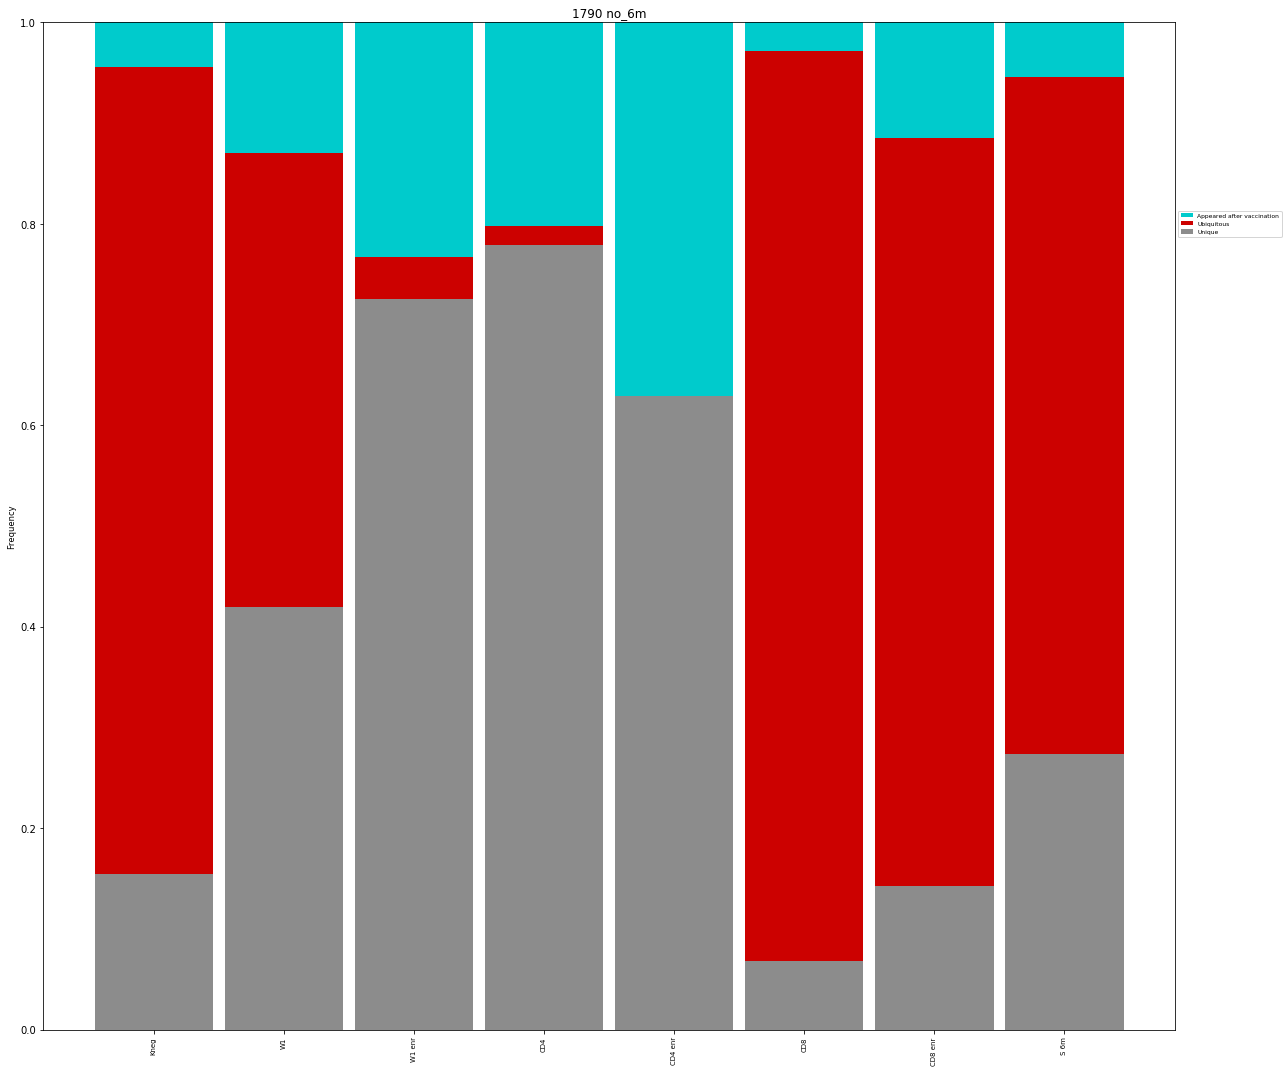

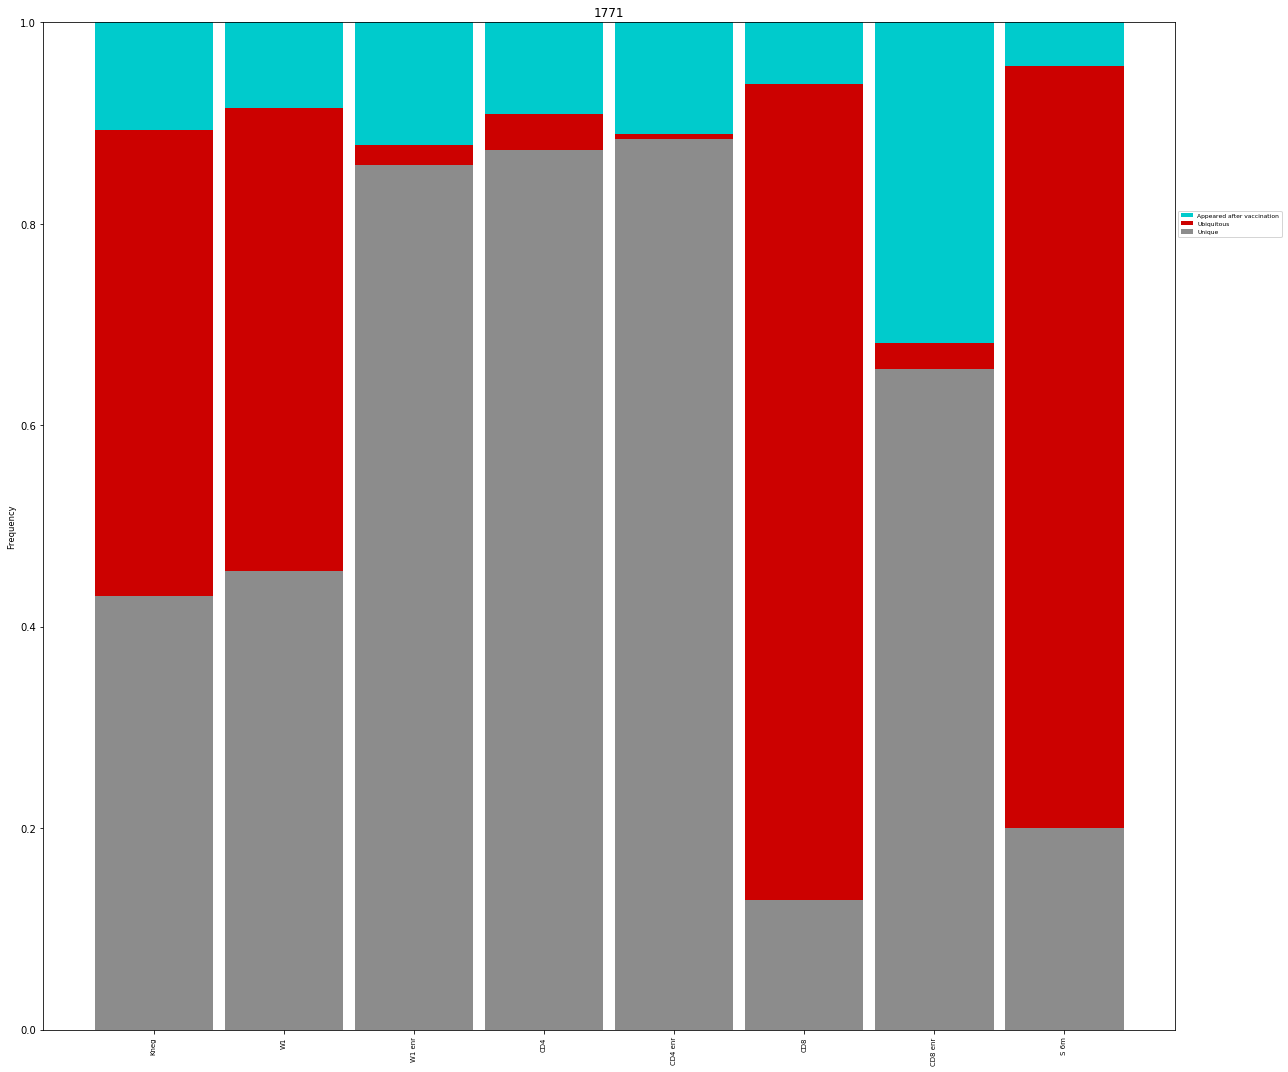

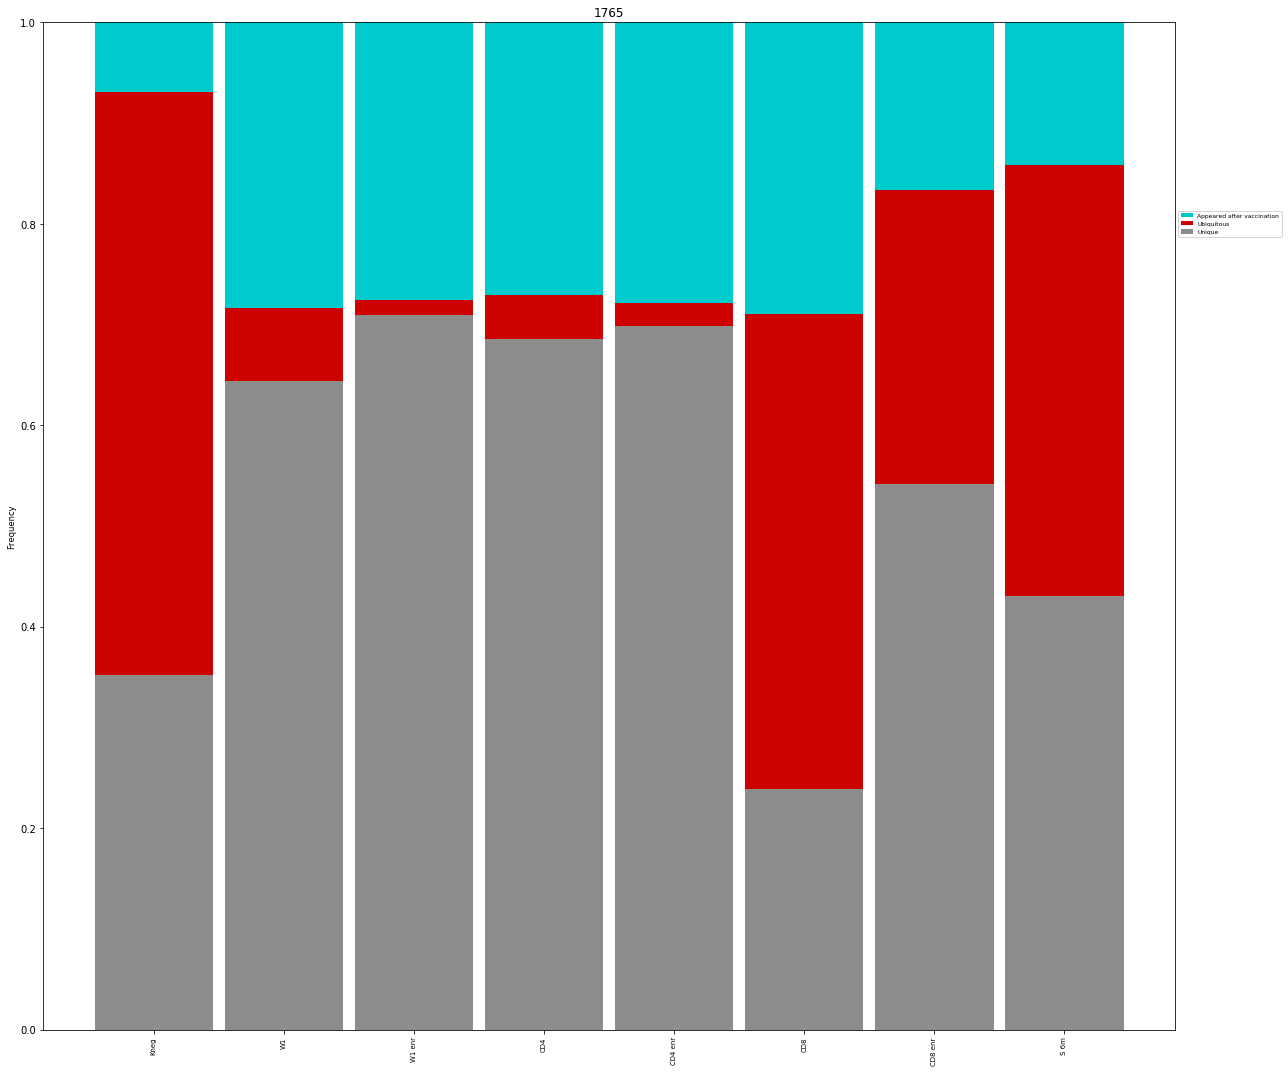

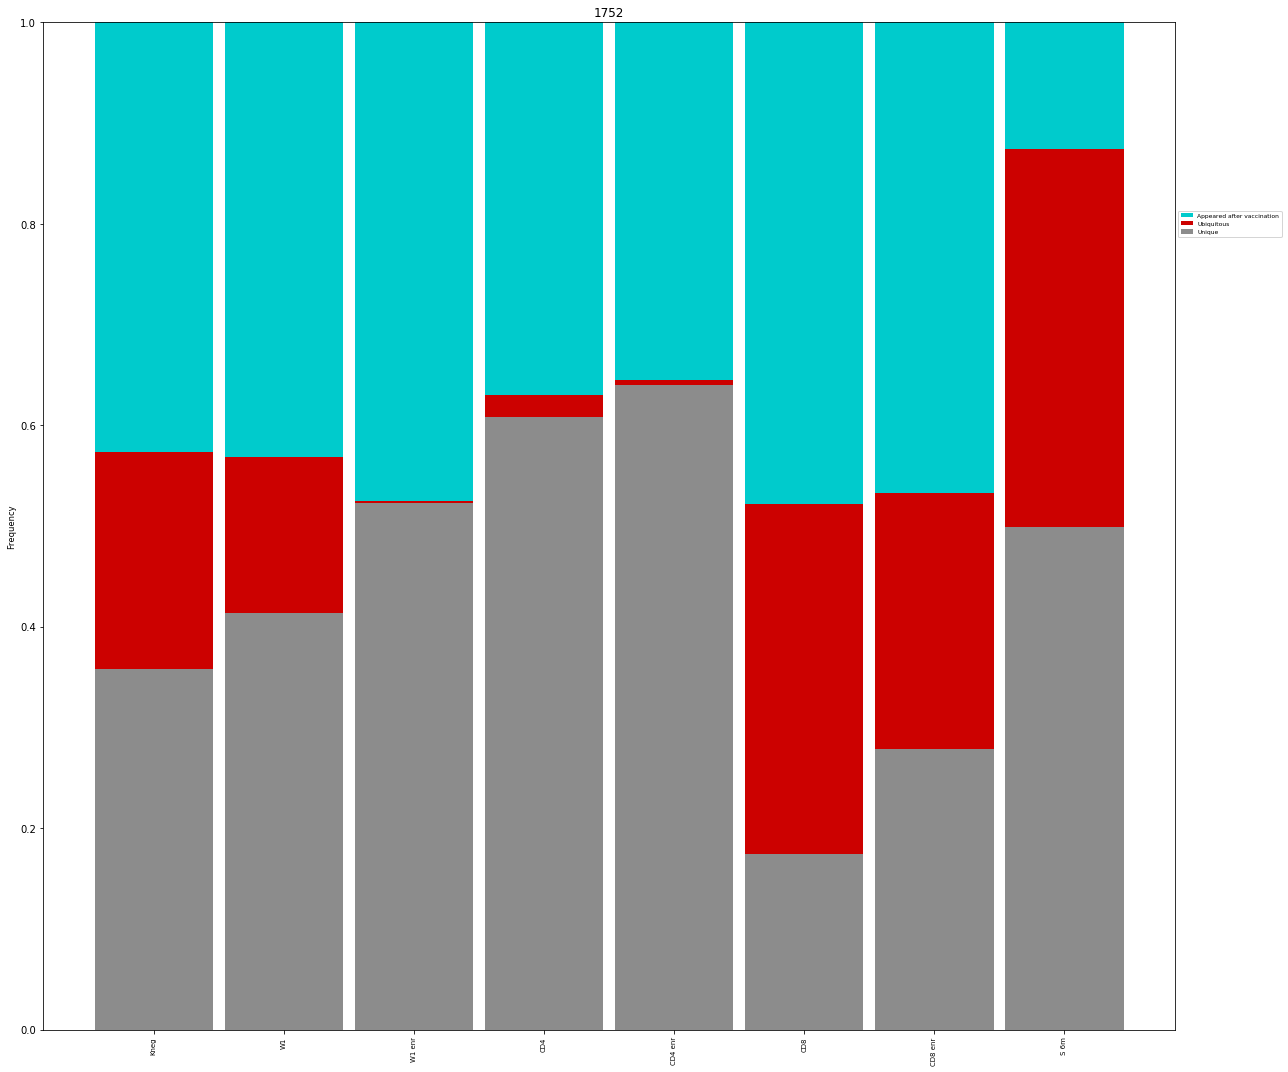

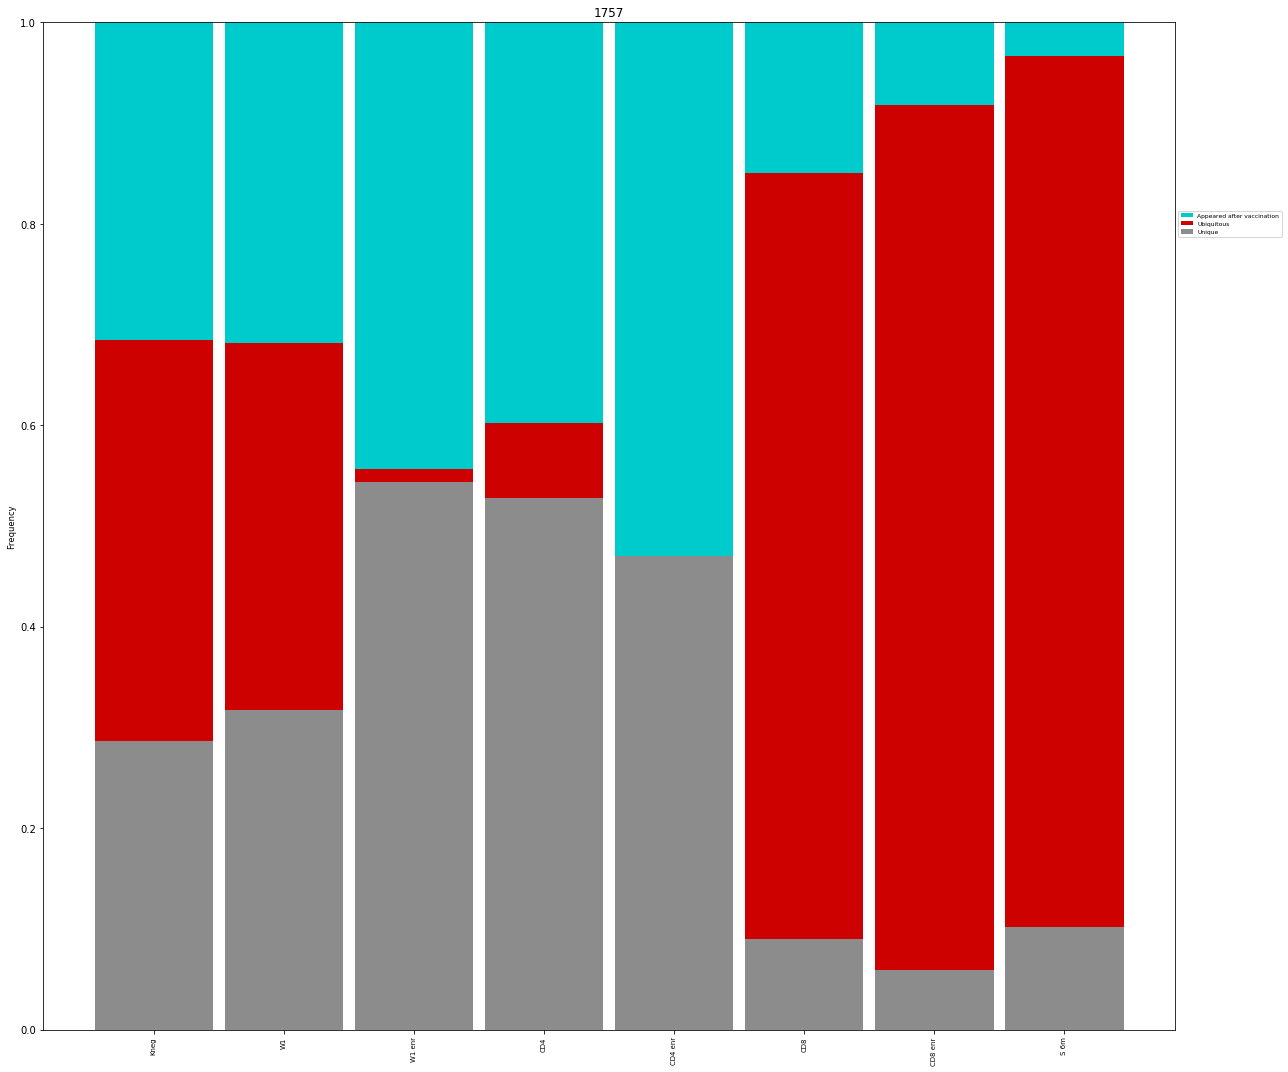

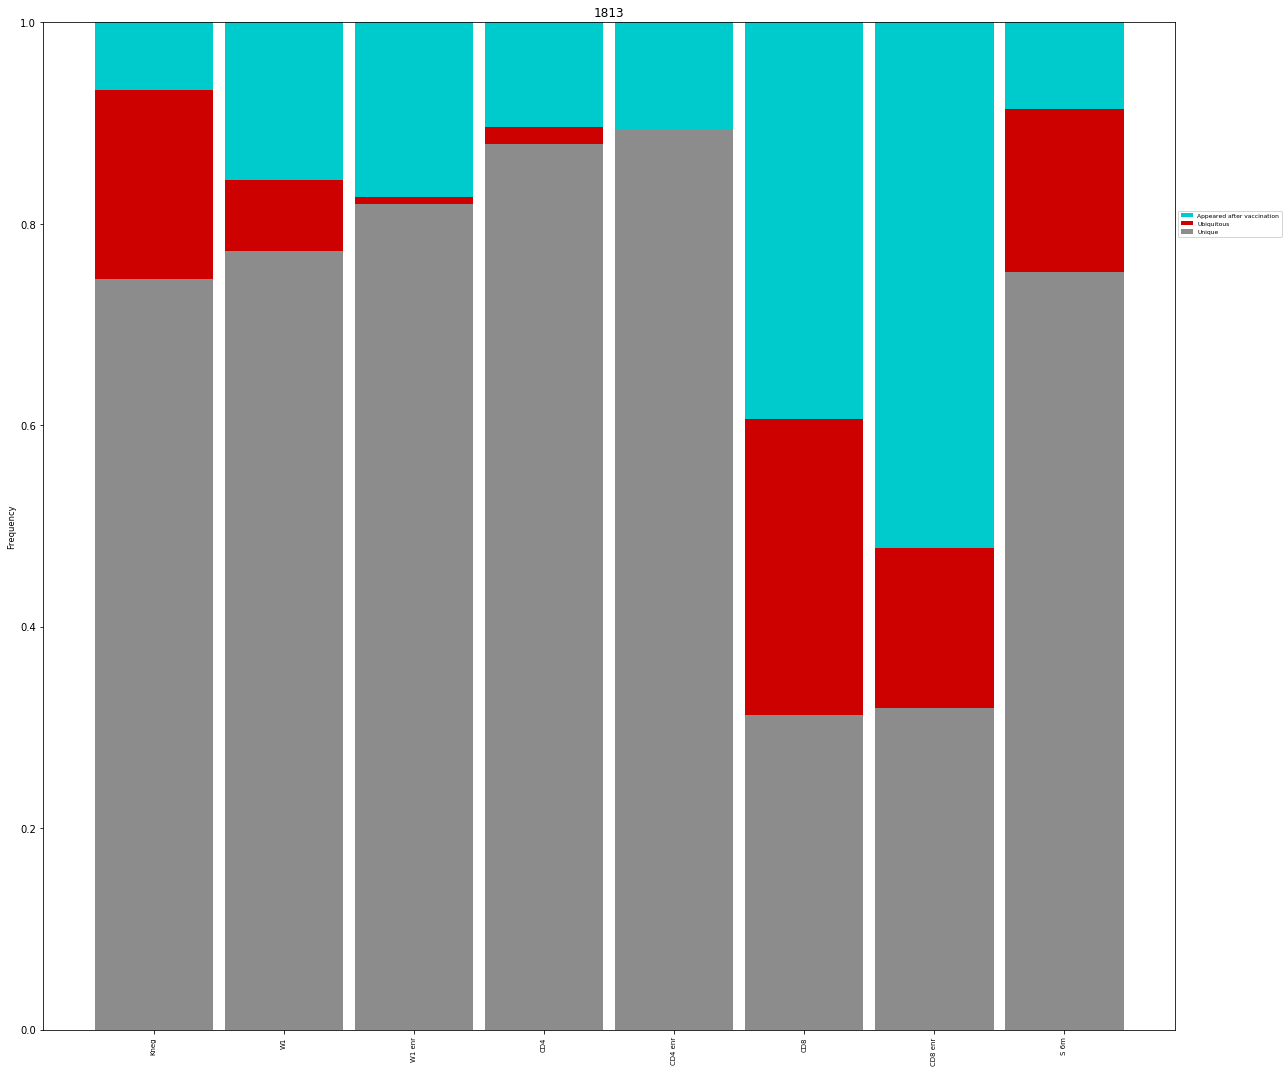

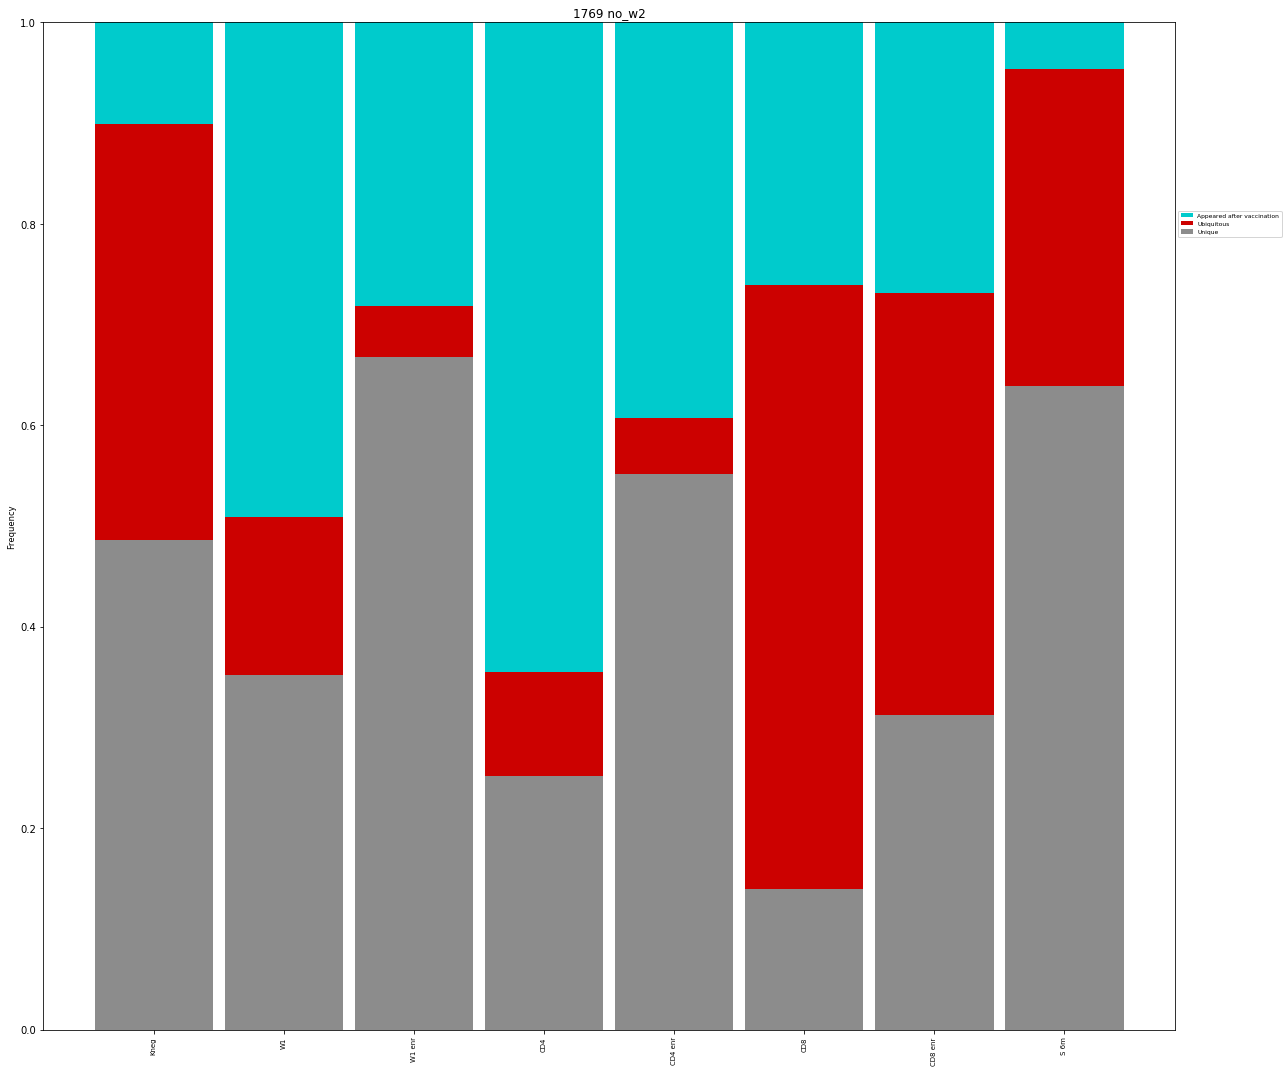

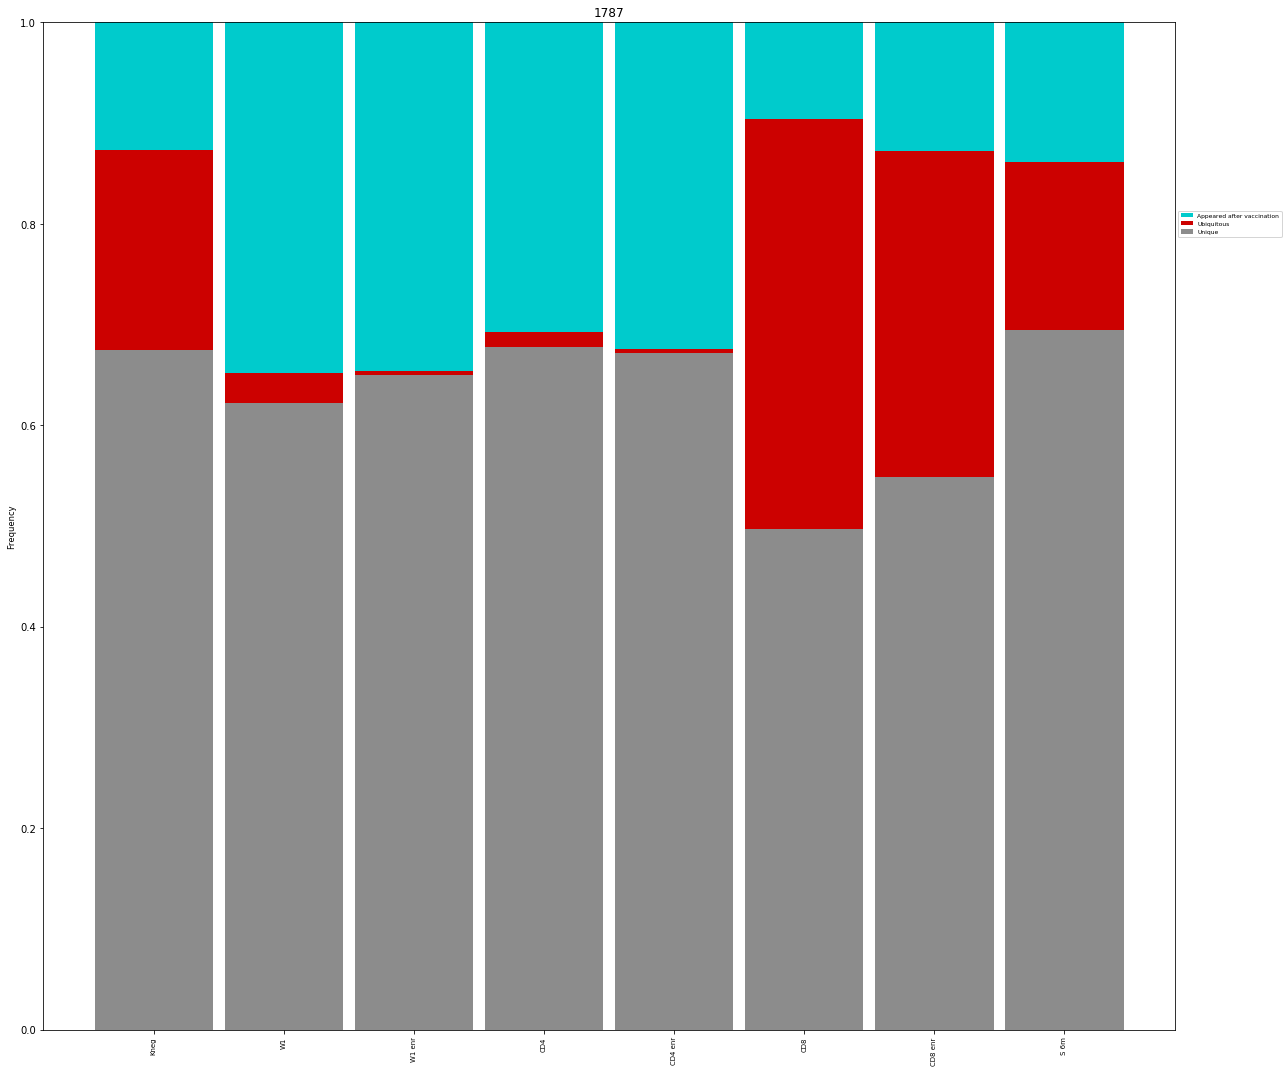

In [56]:
# CDR3 NT

types_dict = {'1802': 'no_d28', '1782':'no_s6m', '1790':'no_6m', '1775':'no_6m_and_s6m',
        '1769':'no_w2'} 


patients = ['1810', '1753','1782','1802','1776','1780','1800','1775','1792','1790',
            '1771','1765','1752','1757','1813','1769','1787']
#patients = ['1810']
summary = pd.DataFrame()
summary_len = pd.DataFrame()
for patient in patients:
    type_patient = "None"
    path_to_result_inter = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/dynamics_spike_used_6m_info/intersect_6M/'+patient+'/'
    os.makedirs(path_to_result_inter, exist_ok = True)
    d0_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+patient+'_total_PBMC_day_0_clonotypes.txt'
    d0 = pd.read_csv(d0_path, delimiter='\t')

    d14_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+patient+'_total_PBMC_day_14_clonotypes.txt'
    d14 = pd.read_csv(d14_path, delimiter='\t')

    if patient in no_d28:
        d28 = empty_df
        type_patient='no_d28'
    else:
        d28_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+patient+'_total_PBMC_day_28_clonotypes.txt'
        d28 = pd.read_csv(d28_path, delimiter='\t')
    if patient in no_6m:
        m6 = empty_df
        type_patient='no_6m'
    else:
        m6_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+patient+'_total_PBMC_6M_clonotypes.txt'
        m6 = pd.read_csv(m6_path, delimiter='\t')

    w1_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.p'+patient+'_Spike_exp_puls_well_1_clonotypes.txt'
    w1 = pd.read_csv(w1_path, delimiter='\t')

    if patient in no_w2:
        w2 = empty_df
    else:
        w2_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.p'+patient+'_Spike_exp_puls_well_2_clonotypes.txt'
        w2 = pd.read_csv(w2_path, delimiter='\t')

    w1_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/final_results/final_enrichment_wells/p'+patient+'/well_1_6m_used/cdr3.enr.vdj.txt'
    w1_enr = pd.read_csv(w1_enr_path, delimiter='\t')

    if patient in no_w2:
        w2_enr = empty_df
    else:
        w2_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/final_results/final_enrichment_wells/p'+patient+'/well_2_6m_used/cdr3.enr.vdj.txt'
        w2_enr = pd.read_csv(w2_enr_path, delimiter='\t')

    cd4_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/cd48_threshold_3/nc.vdj.'+patient+'-cd4_beta.clonotypes.TRB.txt'
    cd4 = pd.read_csv(cd4_path, delimiter='\t')

    cd8_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/cd48_threshold_3/nc.vdj.'+patient+'-cd8_beta.clonotypes.TRB.txt'
    cd8 = pd.read_csv(cd8_path, delimiter='\t')

    cd4_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd4_6m_used/cdr3.enr.vdj.txt'
    cd4_enr = pd.read_csv(cd4_enr_path, delimiter='\t')

    cd8_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd8_6m_used/cdr3.enr.vdj.txt'
    cd8_enr = pd.read_csv(cd8_enr_path, delimiter='\t')

    if patient in no_restim:
        restim = empty_df
    else:
        restim_path= '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.p'+patient+'_Spike_exp_puls_restim_total_clonotypes.txt'
        restim = pd.read_csv(restim_path, delimiter='\t')

    if patient in no_s6m:
        s6m = empty_df
    else:  
        s6m_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/6M_spike/nc.vdj.p'+patient+'_Spike_exp_6M_clonotypes.txt'
        s6m = pd.read_csv(s6m_path, delimiter='\t')

    kneg_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.p'+patient+'_Spike_exp_Kneg_clonotypes.txt'
    kneg = pd.read_csv(kneg_path, delimiter='\t')


    dict_dfs = {'d0': d0, 'd14': d14, 'd28': d28, 'm6': m6}
    intresect_df = intresect_clones_nt_new_combined(dict_dfs,type_patient)



    w1 = make_factor_to_plot_column(w1)
    w2 = make_factor_to_plot_column(w2)

    w1_enr = make_factor_to_plot_column(w1_enr)
    w2_enr = make_factor_to_plot_column(w2_enr)
    w1_enr['freq'] = w1_enr['freq']/sum(w1_enr['freq'])
    w2_enr['freq'] = w2_enr['freq']/sum(w2_enr['freq'])

    cd4 = make_factor_to_plot_column(cd4)
    cd8 = make_factor_to_plot_column(cd8)

    cd4_enr = make_factor_to_plot_column(cd4_enr)
    cd8_enr = make_factor_to_plot_column(cd8_enr)
    cd4_enr['freq'] = cd4_enr['freq']/sum(cd4_enr['freq'])
    cd8_enr['freq'] = cd8_enr['freq']/sum(cd8_enr['freq'])

    restim = make_factor_to_plot_column(restim)
    s6m = make_factor_to_plot_column(s6m)
    kneg = make_factor_to_plot_column(kneg)


    w1_and_intersect = w1.merge(intresect_df, how='left', on='factor').fillna('w1')
    path_to_w1_inter = path_to_result_inter +'w1.txt'
    w1_and_intersect.to_csv(path_to_w1_inter, sep='\t', index=False)
    
    w2_and_intersect = w2.merge(intresect_df, how='left', on='factor').fillna('w2')
    path_to_w2_inter = path_to_result_inter +'w2.txt'
    w2_and_intersect.to_csv(path_to_w2_inter, sep='\t', index=False)

    w1_enr_and_intersect = w1_enr.merge(intresect_df, how='left', on='factor').fillna('w1_enr')
    path_to_w1_enr_inter = path_to_result_inter +'w1_enr.txt'
    w1_enr_and_intersect.to_csv(path_to_w1_enr_inter, sep='\t', index=False)
    
    w2_enr_and_intersect = w2_enr.merge(intresect_df, how='left', on='factor').fillna('w2_enr')
    path_to_w2_enr_inter = path_to_result_inter +'w2_enr.txt'
    w2_enr_and_intersect.to_csv(path_to_w2_enr_inter, sep='\t', index=False)
    

    cd4_and_intersect = cd4.merge(intresect_df, how='left', on='factor').fillna('cd4')
    path_to_cd4_inter = path_to_result_inter +'cd4.txt'
    cd4_and_intersect.to_csv(path_to_cd4_inter, sep='\t', index=False)
    
    cd8_and_intersect = cd8.merge(intresect_df, how='left', on='factor').fillna('cd8')
    path_to_cd8_inter = path_to_result_inter +'cd8.txt'
    cd8_and_intersect.to_csv(path_to_cd8_inter, sep='\t', index=False)
    

    cd4_enr_and_intersect = cd4_enr.merge(intresect_df, how='left', on='factor').fillna('cd4_enr')
    path_to_cd4_enr_inter = path_to_result_inter +'cd4_enr.txt'
    cd4_enr_and_intersect.to_csv(path_to_cd4_enr_inter, sep='\t', index=False)
    
    cd8_enr_and_intersect = cd8_enr.merge(intresect_df, how='left', on='factor').fillna('cd8_enr')
    path_to_cd8_enr_inter = path_to_result_inter +'cd8_enr.txt'
    cd8_enr_and_intersect.to_csv(path_to_cd8_enr_inter, sep='\t', index=False)
    

    restim_and_intersect = restim.merge(intresect_df, how='left', on='factor').fillna('restim')
    path_to_restim_inter = path_to_result_inter +'restim.txt'
    restim_and_intersect.to_csv(path_to_restim_inter, sep='\t', index=False)
    
    s6m_and_intersect = s6m.merge(intresect_df, how='left', on='factor').fillna('s6m')
    path_to_s6m_inter = path_to_result_inter +'s6m.txt'
    s6m_and_intersect.to_csv(path_to_s6m_inter, sep='\t', index=False)
    
    kneg_and_intersect = kneg.merge(intresect_df, how='left', on='factor').fillna('Kneg')
    path_to_kneg_inter = path_to_result_inter +'kneg.txt'
    kneg_and_intersect.to_csv(path_to_kneg_inter, sep='\t', index=False)


    freqs_w1 = freq_for_plots_new_combined(w1_and_intersect, 'w1',type_patient)
    count_w1 = count_for_plots_new_combined(w1_and_intersect, 'w1',type_patient)
    freqs_w2 = freq_for_plots_new_combined(w2_and_intersect, 'w2',type_patient)
    count_w2 = count_for_plots_new_combined(w2_and_intersect, 'w2',type_patient)
    
    freqs_w1_enr = freq_for_plots_new_combined(w1_enr_and_intersect, 'w1_enr',type_patient)
    count_w1_enr = count_for_plots_new_combined(w1_enr_and_intersect, 'w1_enr',type_patient)
    freqs_w2_enr = freq_for_plots_new_combined(w2_enr_and_intersect, 'w2_enr',type_patient)
    count_w2_enr = count_for_plots_new_combined(w2_enr_and_intersect, 'w2_enr',type_patient)

    freqs_cd4 = freq_for_plots_new_combined(cd4_and_intersect, 'cd4',type_patient)
    count_cd4 = count_for_plots_new_combined(cd4_and_intersect, 'cd4',type_patient)
    freqs_cd8 = freq_for_plots_new_combined(cd8_and_intersect, 'cd8',type_patient)
    count_cd8 = count_for_plots_new_combined(cd8_and_intersect, 'cd8',type_patient)
    
    freqs_cd4_enr = freq_for_plots_new_combined(cd4_enr_and_intersect, 'cd4_enr',type_patient)
    count_cd4_enr = count_for_plots_new_combined(cd4_enr_and_intersect, 'cd4_enr',type_patient)
    freqs_cd8_enr = freq_for_plots_new_combined(cd8_enr_and_intersect, 'cd8_enr',type_patient)
    count_cd8_enr = count_for_plots_new_combined(cd8_enr_and_intersect, 'cd8_enr',type_patient)
    
    freq_restim = freq_for_plots_new_combined(restim_and_intersect, 'restim',type_patient)
    count_restim = count_for_plots_new_combined(restim_and_intersect, 'restim',type_patient)
    freq_s6m = freq_for_plots_new_combined(s6m_and_intersect, 's6m',type_patient)
    count_s6m = count_for_plots_new_combined(s6m_and_intersect, 's6m',type_patient)
    freq_kneg = freq_for_plots_new_combined(kneg_and_intersect, 'Kneg',type_patient)
    count_kneg = count_for_plots_new_combined(kneg_and_intersect, 'Kneg',type_patient)


    print(sum(freqs_w1.values()), sum(freqs_w2.values()),
          sum(freqs_w1_enr.values()), sum(freqs_w2_enr.values()),
         sum(freqs_cd4.values()), sum(freqs_cd8.values()),
          sum(freqs_cd4_enr.values()), sum(freqs_cd8_enr.values()),
         sum(freq_restim.values()), sum(freq_s6m.values()))
    
    list_freqs_all = [freq_kneg, freqs_w1, freqs_w1_enr, freqs_cd4, freqs_cd4_enr, freqs_cd8, freqs_cd8_enr, freq_s6m]
    
    values_days = ['good', 'bad', 'unique']
    dict_to_plot = {}
    for value in values_days:
        dict_to_plot[value] = [x[value] for x in list_freqs_all]
    dict_to_plot  

    labels = ['Kneg', 'W1', 'W1 enr', 'CD4', 'CD4 enr', 'CD8', 'CD8 enr', 'S 6m']
    good = np.array(dict_to_plot['good'])
    bad = np.array(dict_to_plot['bad'])
    unique = np.array(dict_to_plot['unique'])

    width = 0.91       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    
    ax.bar(labels, good, width, bottom=bad+unique, 
           label='Appeared after vaccination', color='#00CBCC')
    ax.bar(labels, bad, width, bottom=unique,
           label='Ubiquitous', color='#CC0100')
    ax.bar(labels, unique, width,
           label='Unique', color='#8C8C8C')
    
    plt.xticks(labels, size='x-small', rotation=90)
    
    ax.set_ylim([0, 1])
    ax.set_ylabel('Frequency', size='small')
    if types_dict.get(patient, 0) == 0:
        tit = patient
    else:
        tit = patient + ' ' + types_dict.get(patient, 0)
    
    ax.set_title(tit)
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), prop={'size': 6})

    path_to_png = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/2A/'+patient+'.png'
    plt.tight_layout()
    plt.savefig(path_to_png,dpi=250)
    
    dict_freqs_for_sum = {'w1': freqs_w1, 'w2': freqs_w2, 'w1_enr': freqs_w1_enr, 'w2_enr': freqs_w2_enr, 
                          'cd4': freqs_cd4, 'cd8': freqs_cd8, 'cd4_enr': freqs_cd4_enr, 'cd8_enr': freqs_cd8_enr, 
                          'restim': freq_restim, 's6m': freq_s6m, 'kneg': freq_kneg}
    summary = freqs_or_lens_to_summary(dict_freqs_for_sum, patient, summary)
    
    dict_count_for_sum = {'w1': count_w1, 'w2': count_w2, 'w1_enr': count_w1_enr, 'w2_enr': count_w2_enr, 
                          'cd4': count_cd4, 'cd8': count_cd8, 'cd4_enr': count_cd4_enr, 'cd8_enr': count_cd8_enr, 
                          'restim': count_restim, 's6m': count_s6m, 'kneg': count_kneg}
    summary_len = freqs_or_lens_to_summary(dict_count_for_sum, patient, summary_len)

path_to_sum = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/dynamics_spike_used_6m_info/summary_freq.txt'
summary['patient'] = summary['patient'].astype('int64')
summary.to_csv(path_to_sum, sep='\t', index=False)

path_to_sum_len = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/dynamics_spike_used_6m_info/summary_num_clones.txt'
summary_len['patient'] = summary_len['patient'].astype('int64')
summary_len.to_csv(path_to_sum_len, sep='\t', index=False)




## 2B

### Define functions

In [57]:
def mann_whitney_u_test(distribution_1, distribution_2):
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2,alternative = 'two-sided')
    return u_statistic, p_value

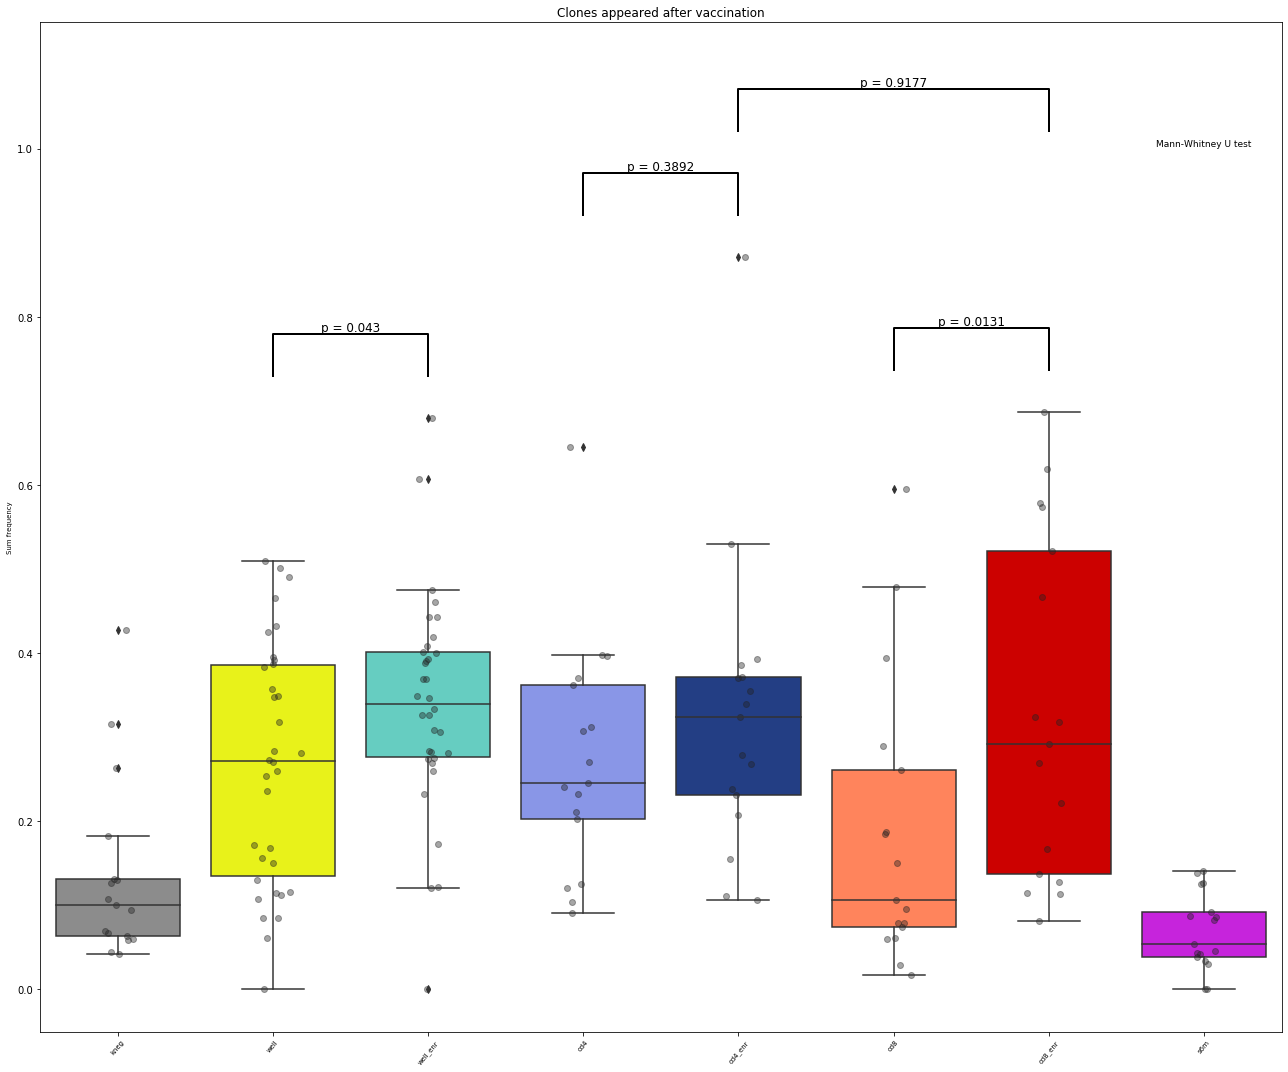

In [58]:
#Good clones
summary = pd.read_csv(path_to_sum, delimiter='\t')
summary_len = pd.read_csv(path_to_sum_len, delimiter='\t')
summary_wells_combined = summary.copy()
summary_wells_combined = summary_wells_combined.replace({'w1':'well', 'w2':'well', 'w1_enr':'well_enr', 'w2_enr':'well_enr'})
summary_wells_combined = summary_wells_combined[summary_wells_combined['type']!='restim']
box_order = CategoricalDtype(
    ['kneg', 'well', 'well_enr', 'cd4', 'cd4_enr', 'cd8', 'cd8_enr', 's6m'], 
    ordered=True
)
summary_wells_combined['type'] = summary_wells_combined['type'].astype(box_order)
summary_wells_combined = summary_wells_combined.sort_values('type')
pallet_wells = ['#8c8c8c', (0.91,0.95,0.1),
                '#66CDC1', '#8996e7', '#233e84', '#ff845c', '#cc0100', '#C624DC']
plt.figure()
plt.rcParams["figure.figsize"] = (20,5)

ax = sns.boxplot(x="type", y="good", data=summary_wells_combined, palette=pallet_wells, saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Sum frequency',fontsize='x-small')
ax.set_xlabel('')
ax.set_ylim([-0.05, 1.15])
ax.set_title('Clones appeared after vaccination')

x = np.random.normal(1, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='well']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='well']['good'], c='#222222', alpha=0.4)

x = np.random.normal(2, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='well_enr']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='well_enr']['good'], c='#222222', alpha=0.4)

x = np.random.normal(3, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='cd4']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='cd4']['good'], c='#222222', alpha=0.4)

x = np.random.normal(5, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='cd8']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='cd8']['good'], c='#222222', alpha=0.4)

x = np.random.normal(4, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='cd4_enr']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='cd4_enr']['good'], c='#222222', alpha=0.4)

x = np.random.normal(6, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='cd8_enr']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='cd8_enr']['good'], c='#222222', alpha=0.4)

x = np.random.normal(7, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='s6m']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='s6m']['good'], c='#222222', alpha=0.4)

x = np.random.normal(0, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='kneg']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='kneg']['good'], c='#222222', alpha=0.4)



y, h, col = summary_wells_combined[(summary_wells_combined['type']=='well')|(summary_wells_combined['type']=='well_enr')]['good'].max() + 0.05, 0.05, 'k'
plt.plot([1, 1, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text((1+2)*.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']=='well']['good']), 
                    list(summary_wells_combined[summary_wells_combined['type']=='well_enr']['good']))[1],4)),
         ha='center', va='bottom', color=col, fontsize=12)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd4')|(summary_wells_combined['type']=='cd4_enr')]['good'].max() + 0.05, 0.05, 'k'
plt.plot([3, 3, 4, 4], [y, y+h, y+h, y], lw=2, c=col)
plt.text((3+4)*.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']=='cd4']['good']), 
                    list(summary_wells_combined[summary_wells_combined['type']=='cd4_enr']['good']))[1],4)),
         ha='center', va='bottom', color=col, fontsize=12)


y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd8')|(summary_wells_combined['type']=='cd8_enr')]['good'].max() + 0.05, 0.05, 'k'
plt.plot([5, 5, 6, 6], [y, y+h, y+h, y], lw=2, c=col)
plt.text((5+6)*.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']=='cd8']['good']), 
                    list(summary_wells_combined[summary_wells_combined['type']=='cd8_enr']['good']))[1],4)),
         ha='center', va='bottom', color=col, fontsize=12)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd4_enr')|(summary_wells_combined['type']=='cd8_enr')]['good'].max() + 0.15, 0.05, 'k'
plt.plot([4, 4, 6, 6], [y, y+h, y+h, y], lw=2, c=col)
plt.text((4+6)*.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']=='cd4_enr']['good']), 
                    list(summary_wells_combined[summary_wells_combined['type']=='cd8_enr']['good']))[1],4)),
         ha='center', va='bottom', color=col, fontsize=12)


plt.text(7, 1, "Mann-Whitney U test",
         ha='center', va='bottom', color=col, fontsize=9)
plt.tight_layout()
path_to_png = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/2B/good_clones.png'
plt.savefig(path_to_png,bbox_inches='tight', dpi=250)
plt.show()

#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_wells_combined['type'].unique()):
    for y in list(summary_wells_combined['type'].unique()):
        if x!=y:
            pval = mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']==x]['good']), 
                    list(summary_wells_combined[summary_wells_combined['type']==y]['good']))[1]
            new_row = {'X': x, 'Y': y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/2B/good_clones_pval.txt'
statistics.to_csv(path_statistics, sep='\t', index=False)



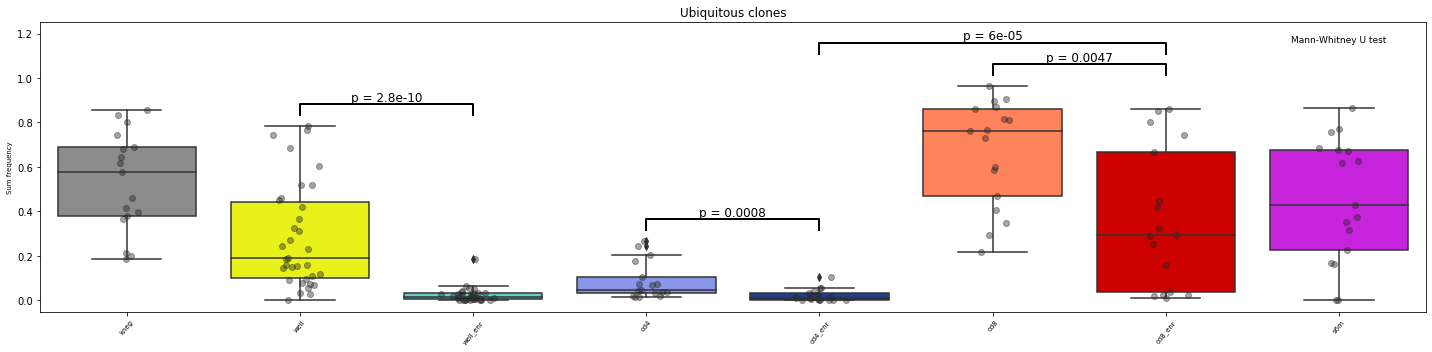

In [59]:
#Bad clones
plt.figure()
plt.rcParams["figure.figsize"] = (20,5)

ax = sns.boxplot(x="type", y="bad", data=summary_wells_combined, palette=pallet_wells, saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Sum frequency',fontsize='x-small')
ax.set_xlabel('')
ax.set_ylim([-0.05, 1.25])
ax.set_title('Ubiquitous clones')

x = np.random.normal(1, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='well']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='well']['bad'], c='#222222', alpha=0.4)

x = np.random.normal(2, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='well_enr']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='well_enr']['bad'], c='#222222', alpha=0.4)

x = np.random.normal(3, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='cd4']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='cd4']['bad'], c='#222222', alpha=0.4)

x = np.random.normal(5, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='cd8']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='cd8']['bad'], c='#222222', alpha=0.4)

x = np.random.normal(4, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='cd4_enr']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='cd4_enr']['bad'], c='#222222', alpha=0.4)

x = np.random.normal(6, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='cd8_enr']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='cd8_enr']['bad'], c='#222222', alpha=0.4)

x = np.random.normal(7, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='s6m']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='s6m']['bad'], c='#222222', alpha=0.4)

x = np.random.normal(0, 0.06, size=len(summary_wells_combined[summary_wells_combined['type']=='kneg']))
plt.scatter(x, summary_wells_combined[summary_wells_combined['type']=='kneg']['bad'], c='#222222', alpha=0.4)



y, h, col = summary_wells_combined[(summary_wells_combined['type']=='well')|(summary_wells_combined['type']=='well_enr')]['bad'].max() + 0.05, 0.05, 'k'
plt.plot([1, 1, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text((1+2)*.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']=='well']['bad']), 
                    list(summary_wells_combined[summary_wells_combined['type']=='well_enr']['bad']))[1],11)),
         ha='center', va='bottom', color=col, fontsize=12)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd4')|(summary_wells_combined['type']=='cd4_enr')]['bad'].max() + 0.05, 0.05, 'k'
plt.plot([3, 3, 4, 4], [y, y+h, y+h, y], lw=2, c=col)
plt.text((3+4)*.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']=='cd4']['bad']), 
                    list(summary_wells_combined[summary_wells_combined['type']=='cd4_enr']['bad']))[1],4)),
         ha='center', va='bottom', color=col, fontsize=12)


y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd8')|(summary_wells_combined['type']=='cd8_enr')]['bad'].max() + 0.05, 0.05, 'k'
plt.plot([5, 5, 6, 6], [y, y+h, y+h, y], lw=2, c=col)
plt.text((5+6)*.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']=='cd8']['bad']), 
                    list(summary_wells_combined[summary_wells_combined['type']=='cd8_enr']['bad']))[1],4)),
         ha='center', va='bottom', color=col, fontsize=12)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd4_enr')|(summary_wells_combined['type']=='cd8_enr')]['bad'].max() + 0.25, 0.05, 'k'
plt.plot([4, 4, 6, 6], [y, y+h, y+h, y], lw=2, c=col)
plt.text((4+6)*.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']=='cd4_enr']['bad']), 
                    list(summary_wells_combined[summary_wells_combined['type']=='cd8_enr']['bad']))[1],5)),
         ha='center', va='bottom', color=col, fontsize=12)


plt.text(7, 1.15, "Mann-Whitney U test",
         ha='center', va='bottom', color=col, fontsize=9)

path_to_png = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/2B/bad_clones.png'
plt.tight_layout()
plt.savefig(path_to_png,bbox_inches='tight', dpi=250)
plt.show()


#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_wells_combined['type'].unique()):
    for y in list(summary_wells_combined['type'].unique()):
        if x!=y:
            pval = mann_whitney_u_test(list(summary_wells_combined[summary_wells_combined['type']==x]['bad']), 
                    list(summary_wells_combined[summary_wells_combined['type']==y]['bad']))[1]
            new_row = {'X': x, 'Y': y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/2B/bad_clones_pval.txt'
statistics.to_csv(path_statistics, sep='\t', index=False)



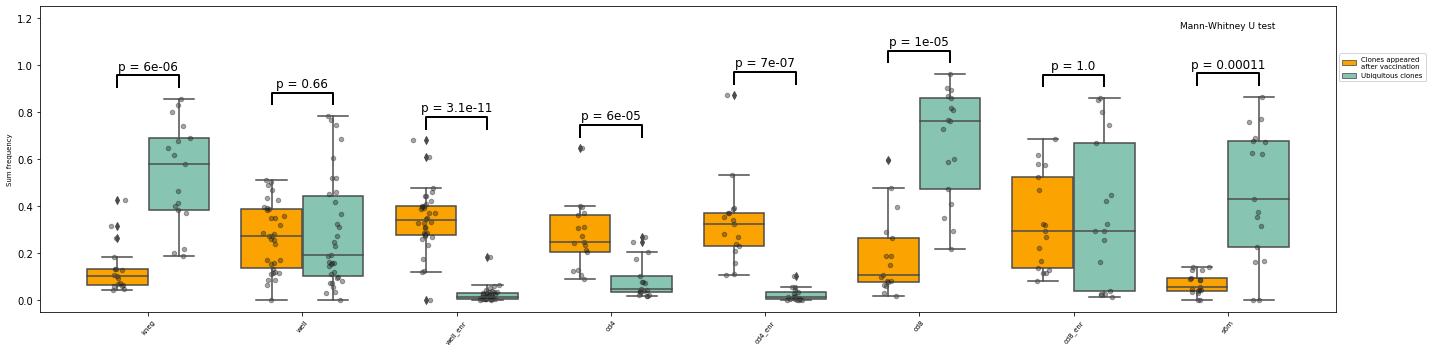

In [60]:
#Box plot kneg vs well
summary_wells_combined = pd.melt(summary_wells_combined, id_vars=['type', 'patient'], value_vars=['good', 'bad'])
summary_wells_combined = summary_wells_combined.rename(columns={'variable': 'clones type'})

summary_wells_combined_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/2C/melted_summary.txt'
summary_wells_combined.to_csv(summary_wells_combined_path, sep='\t', index=False)

summary_wells_combined_for_legend = summary_wells_combined.replace({'good': 'Clones appeared \nafter vaccination',
                                                                   'bad':'Ubiquitous clones'})
pallet_wells = ['#FBA300', '#87C4B1']
plt.figure()
plt.rcParams["figure.figsize"] = (20,5)

ax = sns.boxplot(x="type", y="value", hue="clones type", data=summary_wells_combined_for_legend, palette=pallet_wells, 
                 saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Sum frequency',fontsize='x-small')
ax.set_xlabel('')
ax.set_ylim([-0.05, 1.25])

plt.legend(fontsize='x-small', loc='center left', bbox_to_anchor=(1, 0.8))#, labels=['Clones appeared \nafter vaccination', 'Ubiquitous clones'])

#Kneg
x = np.random.normal(-0.2, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='kneg')&(summary_wells_combined['clones type']=='good')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='kneg')&(summary_wells_combined['clones type']=='good')]['value'], c='#222222', alpha=0.4, s=20)

x = np.random.normal(0.2, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='kneg')&(summary_wells_combined['clones type']=='bad')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='kneg')&(summary_wells_combined['clones type']=='bad')]['value'], c='#222222', alpha=0.4, s=20)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='kneg')]['value'].max() + 0.05, 0.05, 'k'
plt.plot([-0.2, -0.2, 0.2, 0.2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(0, y+h+0.01, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[(summary_wells_combined['type']=='kneg')&(summary_wells_combined['clones type']=='good')]['value']), 
                    list(summary_wells_combined[(summary_wells_combined['type']=='kneg')&(summary_wells_combined['clones type']=='bad')]['value']))[1],6)),
         ha='center', va='bottom', color=col, fontsize=12)


#Well
x = np.random.normal(0.8, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='well')&(summary_wells_combined['clones type']=='good')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='well')&(summary_wells_combined['clones type']=='good')]['value'], c='#222222', alpha=0.4, s=20)

x = np.random.normal(1.2, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='well')&(summary_wells_combined['clones type']=='bad')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='well')&(summary_wells_combined['clones type']=='bad')]['value'], c='#222222', alpha=0.4, s=20)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='well')]['value'].max() + 0.05, 0.05, 'k'
plt.plot([0.8, 0.8, 1.2, 1.2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(1, y+h+0.01, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[(summary_wells_combined['type']=='well')&(summary_wells_combined['clones type']=='good')]['value']), 
                    list(summary_wells_combined[(summary_wells_combined['type']=='well')&(summary_wells_combined['clones type']=='bad')]['value']))[1],2)),
         ha='center', va='bottom', color=col, fontsize=12)


#Well enr
x = np.random.normal(1.8, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='well_enr')&(summary_wells_combined['clones type']=='good')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='well_enr')&(summary_wells_combined['clones type']=='good')]['value'], c='#222222', alpha=0.4, s=20)

x = np.random.normal(2.2, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='well_enr')&(summary_wells_combined['clones type']=='bad')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='well_enr')&(summary_wells_combined['clones type']=='bad')]['value'], c='#222222', alpha=0.4, s=20)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='well_enr')]['value'].max() + 0.05, 0.05, 'k'
plt.plot([1.8, 1.8, 2.2, 2.2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(2, y+h+0.01, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[(summary_wells_combined['type']=='well_enr')&(summary_wells_combined['clones type']=='good')]['value']), 
                    list(summary_wells_combined[(summary_wells_combined['type']=='well_enr')&(summary_wells_combined['clones type']=='bad')]['value']))[1],12)),
         ha='center', va='bottom', color=col, fontsize=12)


#CD4
x = np.random.normal(2.8, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='cd4')&(summary_wells_combined['clones type']=='good')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='cd4')&(summary_wells_combined['clones type']=='good')]['value'], c='#222222', alpha=0.4, s=20)

x = np.random.normal(3.2, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='cd4')&(summary_wells_combined['clones type']=='bad')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='cd4')&(summary_wells_combined['clones type']=='bad')]['value'], c='#222222', alpha=0.4, s=20)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd4')]['value'].max() + 0.05, 0.05, 'k'
plt.plot([2.8, 2.8, 3.2, 3.2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(3, y+h+0.01, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[(summary_wells_combined['type']=='cd4')&(summary_wells_combined['clones type']=='good')]['value']), 
                    list(summary_wells_combined[(summary_wells_combined['type']=='cd4')&(summary_wells_combined['clones type']=='bad')]['value']))[1],
                                  5)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD4 enr
x = np.random.normal(3.8, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='cd4_enr')&(summary_wells_combined['clones type']=='good')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='cd4_enr')&(summary_wells_combined['clones type']=='good')]['value'], c='#222222', alpha=0.4, s=20)

x = np.random.normal(4.2, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='cd4_enr')&(summary_wells_combined['clones type']=='bad')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='cd4_enr')&(summary_wells_combined['clones type']=='bad')]['value'], c='#222222', alpha=0.4, s=20)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd4_enr')]['value'].max() + 0.05, 0.05, 'k'
plt.plot([3.8, 3.8, 4.2, 4.2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(4, y+h+0.01, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[(summary_wells_combined['type']=='cd4_enr')&(summary_wells_combined['clones type']=='good')]['value']), 
                    list(summary_wells_combined[(summary_wells_combined['type']=='cd4_enr')&(summary_wells_combined['clones type']=='bad')]['value']))[1],
                                  7)),
         ha='center', va='bottom', color=col, fontsize=12)


#CD8
x = np.random.normal(4.8, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='cd8')&(summary_wells_combined['clones type']=='good')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='cd8')&(summary_wells_combined['clones type']=='good')]['value'], c='#222222', alpha=0.4, s=20)

x = np.random.normal(5.2, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='cd8')&(summary_wells_combined['clones type']=='bad')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='cd8')&(summary_wells_combined['clones type']=='bad')]['value'], c='#222222', alpha=0.4, s=20)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd8')]['value'].max() + 0.05, 0.05, 'k'
plt.plot([4.8, 4.8, 5.2, 5.2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(5, y+h+0.01, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[(summary_wells_combined['type']=='cd8')&(summary_wells_combined['clones type']=='good')]['value']), 
                    list(summary_wells_combined[(summary_wells_combined['type']=='cd8')&(summary_wells_combined['clones type']=='bad')]['value']))[1],
                                  6)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD8 enr
x = np.random.normal(5.8, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='cd8_enr')&(summary_wells_combined['clones type']=='good')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='cd8_enr')&(summary_wells_combined['clones type']=='good')]['value'], c='#222222', alpha=0.4, s=20)

x = np.random.normal(6.2, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='cd8_enr')&(summary_wells_combined['clones type']=='bad')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='cd8_enr')&(summary_wells_combined['clones type']=='bad')]['value'], c='#222222', alpha=0.4, s=20)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='cd8_enr')]['value'].max() + 0.05, 0.05, 'k'
plt.plot([5.8, 5.8, 6.2, 6.2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(6, y+h+0.01, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[(summary_wells_combined['type']=='cd8_enr')&(summary_wells_combined['clones type']=='good')]['value']), 
                    list(summary_wells_combined[(summary_wells_combined['type']=='cd8_enr')&(summary_wells_combined['clones type']=='bad')]['value']))[1],
                                  2)),
         ha='center', va='bottom', color=col, fontsize=12)


#S6m
x = np.random.normal(6.8, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='s6m')&(summary_wells_combined['clones type']=='good')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='s6m')&(summary_wells_combined['clones type']=='good')]['value'], c='#222222', alpha=0.4, s=20)

x = np.random.normal(7.2, 0.03, size=len(summary_wells_combined[(summary_wells_combined['type']=='s6m')&(summary_wells_combined['clones type']=='bad')]))
plt.scatter(x, 
summary_wells_combined[(summary_wells_combined['type']=='s6m')&(summary_wells_combined['clones type']=='bad')]['value'], c='#222222', alpha=0.4, s=20)

y, h, col = summary_wells_combined[(summary_wells_combined['type']=='s6m')]['value'].max() + 0.05, 0.05, 'k'
plt.plot([6.8, 6.8, 7.2, 7.2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(7, y+h+0.01, 'p = '+str(round(mann_whitney_u_test(list(summary_wells_combined[(summary_wells_combined['type']=='s6m')&(summary_wells_combined['clones type']=='good')]['value']), 
                    list(summary_wells_combined[(summary_wells_combined['type']=='s6m')&(summary_wells_combined['clones type']=='bad')]['value']))[1],
                                  5)),
         ha='center', va='bottom', color=col, fontsize=12)

plt.text(7, 1.15, "Mann-Whitney U test",
         ha='center', va='bottom', color=col, fontsize=9)
path_to_png = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/2C/2C.png'
plt.tight_layout()
plt.savefig(path_to_png,bbox_inches='tight', dpi=250)
plt.show()


#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_wells_combined['type'].unique()):
    pval = mann_whitney_u_test(list(summary_wells_combined[(summary_wells_combined['type']==x)&(summary_wells_combined['clones type']=='bad')]['value']), 
            list(summary_wells_combined[(summary_wells_combined['type']==x)&(summary_wells_combined['clones type']=='good')]['value']))[1]
    new_row = {'X': x, 'Pval': pval}
    statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/2C/pval.txt'
statistics.to_csv(path_statistics, sep='\t', index=False)



## 2H

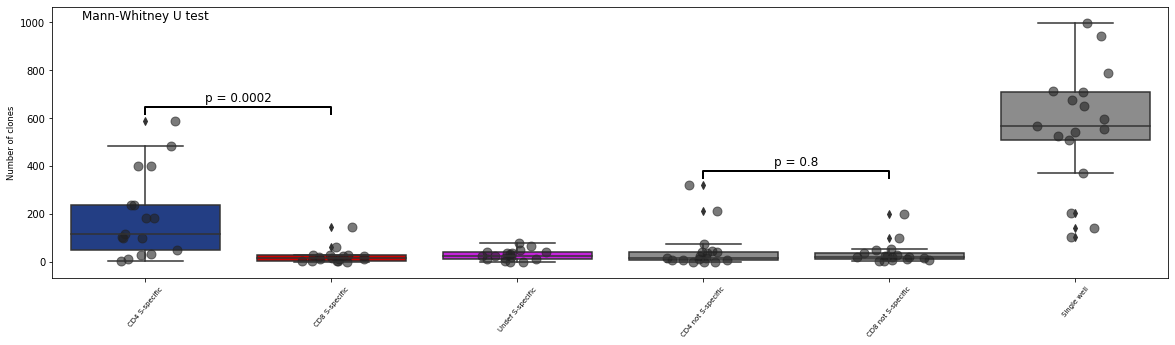

In [61]:
path_all = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/'
path_to_all_venn = glob.glob(path_all+'venns_tables/p*/venn_cdr3nt.txt')
summary_venn_results = pd.DataFrame()
#path_to_all_venn = path_to_all_venn[:1]
for venn_path in path_to_all_venn:
    patient = venn_path.split('/')[-2][1:]
    path_to_resulting_clones = path_all + '/clones_from_venn/'+patient+'/'
    os.makedirs(path_to_resulting_clones, exist_ok = True)
    venn_table = pd.read_csv(venn_path)
    cd4_table = venn_table[(venn_table['type']=='CD4&Well1&Well2')|(venn_table['type']=='CD4&Well1')|(venn_table['type']=='CD4&Well2')]
    cd8_table = venn_table[(venn_table['type']=='CD8&Well1&Well2')|(venn_table['type']=='Well1&CD8')|(venn_table['type']=='Well2&CD8')]
    undef_table = venn_table[(venn_table['type']=='Well1&Well2')]
    single_well_table = venn_table[(venn_table['type']=='Well1')|(venn_table['type']=='Well2')]
    single_cd4_table = venn_table[(venn_table['type']=='CD4')]
    single_cd8_table = venn_table[(venn_table['type']=='CD8')]
    if len(venn_table) != (len(cd4_table)+len(cd8_table)+len(undef_table)+len(single_well_table)+len(single_cd4_table)+len(single_cd8_table)):
        print(len(venn_table), (len(cd4_table)+len(cd8_table)+len(undef_table)+len(single_well_table)+len(single_cd4_table)+len(single_cd8_table)))
    
    cd4_table.to_csv(path_to_resulting_clones+'cd4.txt', sep='\t', index=False)
    cd8_table.to_csv(path_to_resulting_clones+'cd8.txt', sep='\t', index=False)
    undef_table.to_csv(path_to_resulting_clones+'undef.txt', sep='\t', index=False)
    single_well_table.to_csv(path_to_resulting_clones+'single_well.txt', sep='\t', index=False)
    single_cd4_table.to_csv(path_to_resulting_clones+'single_cd4.txt', sep='\t', index=False)
    single_cd8_table.to_csv(path_to_resulting_clones+'single_cd8.txt', sep='\t', index=False)
    
    new_row = {'patient':patient, 'type': 'CD4 S-specific', 'number_of_clones': len(cd4_table)}
    summary_venn_results = summary_venn_results.append(new_row, ignore_index=True)
    new_row = {'patient':patient, 'type': 'CD8 S-specific', 'number_of_clones': len(cd8_table)}
    summary_venn_results = summary_venn_results.append(new_row, ignore_index=True)
    new_row = {'patient':patient, 'type': 'Undef S-specific', 'number_of_clones': len(undef_table)}
    summary_venn_results = summary_venn_results.append(new_row, ignore_index=True)
    new_row = {'patient':patient, 'type': 'Single well', 'number_of_clones': len(single_well_table)}
    summary_venn_results = summary_venn_results.append(new_row, ignore_index=True)
    new_row = {'patient':patient, 'type': 'CD4 not S-specific', 'number_of_clones': len(single_cd4_table)}
    summary_venn_results = summary_venn_results.append(new_row, ignore_index=True)
    new_row = {'patient':patient, 'type': 'CD8 not S-specific', 'number_of_clones': len(single_cd8_table)}
    summary_venn_results = summary_venn_results.append(new_row, ignore_index=True)
    
summary_venn_results_path = path_all + '/clones_from_venn/summary_number_clones_from_venn.txt'
summary_venn_results.to_csv(summary_venn_results_path, sep='\t', index=False)


summary_venn_results_to_plot = summary_venn_results.copy()
box_order = CategoricalDtype(
    ['CD4 S-specific', 'CD8 S-specific', 'Undef S-specific', 'CD4 not S-specific', 
     'CD8 not S-specific', 'Single well'], 
    ordered=True
)
summary_venn_results_to_plot['type'] = summary_venn_results_to_plot['type'].astype(box_order)
summary_venn_results_to_plot = summary_venn_results_to_plot.sort_values('type')


pallet_wells = ['#233e84', '#cc0100', '#C624DC', '#8c8c8c', '#8c8c8c', '#8c8c8c']

plt.figure()
plt.rcParams["figure.figsize"] = (18,15)

ax = sns.boxplot(x="type", y="number_of_clones", data=summary_venn_results_to_plot, palette=pallet_wells, 
                 saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Number of clones',fontsize='small')
ax.set_xlabel('')

#CD4
x = np.random.normal(0, 0.1, size=len(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD4 S-specific')]))
plt.scatter(x, 
summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD4 S-specific')]['number_of_clones'], c='#222222', alpha=0.6, s=80)

#CD8
x = np.random.normal(1, 0.1, size=len(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD8 S-specific')]))
plt.scatter(x, 
summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD8 S-specific')]['number_of_clones'], c='#222222', alpha=0.6, s=80)


y, h, col = summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD4 S-specific')]['number_of_clones'].max() + 30, 30, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c=col)
plt.text(0.5, y+h+10, 'p = '+str(round(mann_whitney_u_test(list(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD4 S-specific')]['number_of_clones']), 
                    list(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD8 S-specific')]['number_of_clones']))[1],
                                       4)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD4 only
x = np.random.normal(3, 0.1, size=len(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD4 not S-specific')]))
plt.scatter(x, 
summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD4 not S-specific')]['number_of_clones'], c='#222222', alpha=0.6, s=80)

#CD8 only
x = np.random.normal(4, 0.1, size=len(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD8 not S-specific')]))
plt.scatter(x, 
summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD8 not S-specific')]['number_of_clones'], c='#222222', alpha=0.6, s=80)


y, h, col = summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD4 not S-specific')]['number_of_clones'].max() + 30, 30, 'k'
plt.plot([3, 3, 4, 4], [y, y+h, y+h, y], lw=2, c=col)
plt.text(3.5, y+h+10, 'p = '+str(round(mann_whitney_u_test(list(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD4 not S-specific')]['number_of_clones']), 
                    list(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='CD8 not S-specific')]['number_of_clones']))[1],
                                       1)),
         ha='center', va='bottom', color=col, fontsize=12)


#Undef
x = np.random.normal(2, 0.1, size=len(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='Undef S-specific')]))
plt.scatter(x, 
summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='Undef S-specific')]['number_of_clones'], c='#222222', alpha=0.6, s=80)

#Well
x = np.random.normal(5, 0.1, size=len(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='Single well')]))
plt.scatter(x, 
summary_venn_results_to_plot[(summary_venn_results_to_plot['type']=='Single well')]['number_of_clones'], c='#222222', alpha=0.6, s=80)



plt.text(0, 1000, "Mann-Whitney U test",
         ha='center', va='bottom', color=col, fontsize=12)

path_to_png = path_all+'2H/2H(num).png'
plt.savefig(path_to_png,bbox_inches='tight', dpi=450)

plt.show()


#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_venn_results_to_plot['type'].unique()):
    for y in list(summary_venn_results_to_plot['type'].unique()):
        if x!=y:
            pval = mann_whitney_u_test(list(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']==x)]['number_of_clones']), 
                            list(summary_venn_results_to_plot[(summary_venn_results_to_plot['type']==y)]['number_of_clones']))[1]
            new_row = {'X': x, 'Y':y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/2H/pval(num).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)



## 2I

### Define functions

In [62]:
def make_factor_nt_d14(df, type_df_file):
    df['cdr3'] = df['cdr3nt'].map(str) + '|' + df['v'].map(str) + '|' + df['j'].map(str)
    df['freq_'+type_df_file] = df['freq']
    df = df.loc[:,['cdr3', 'freq_'+type_df_file]]
    return(df)

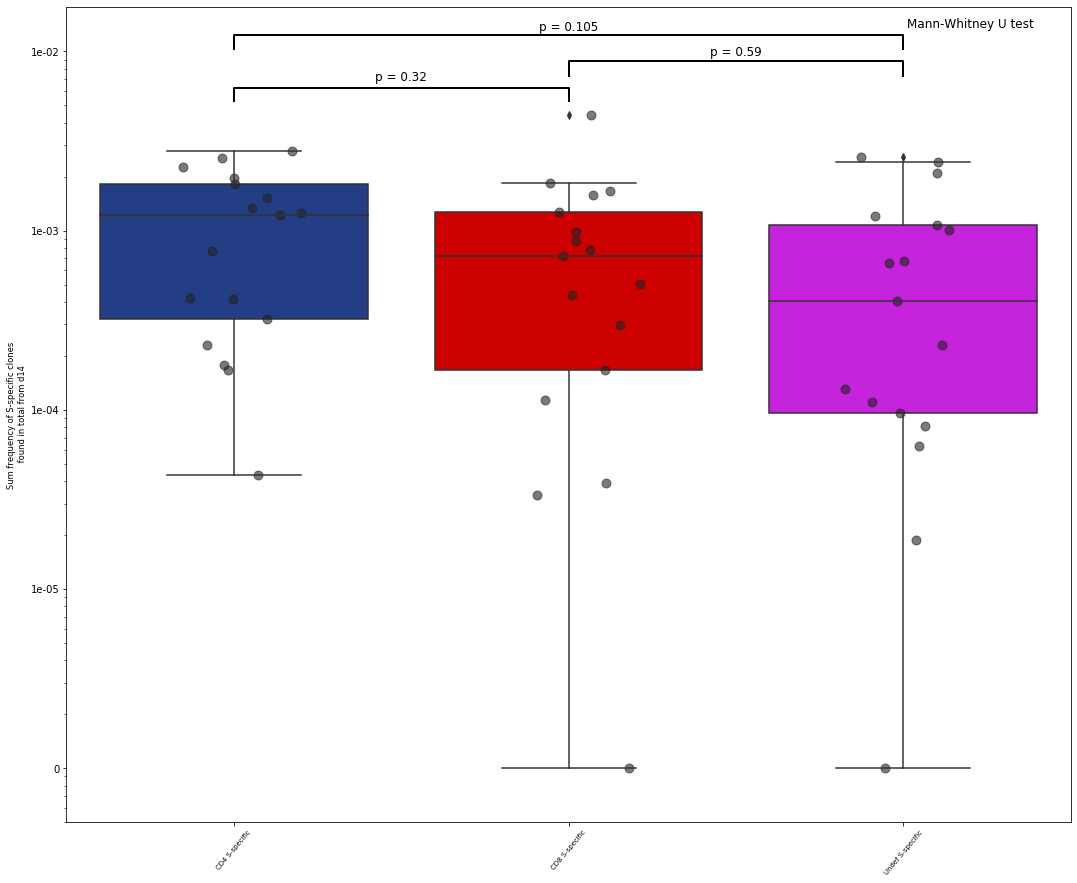

In [63]:
path_all = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/'
total_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'

summary_clones_in_d14 = pd.DataFrame()

s_specific_files = glob.glob(path_all + 'clones_from_venn/*/*.txt')
s_specific_files = [x for x in s_specific_files if 'single' not in x]
patients = list(set([x.split('/')[-2] for x in s_specific_files]))
#patients = patients[:1]
for patient in patients:    
    patients_files = [x for x in s_specific_files if patient in x]
    
    d14_path = total_path + patient + '_total_PBMC_day_14_clonotypes.txt'
    d14 = pd.read_csv(d14_path, delimiter='\t')
    d14_w_factor = make_factor_nt_d14(d14, 'd14')
    
    #patients_files = patients_files[:1]
    for patient_file_path in patients_files:
        path_to_with_totals = '/'.join(patient_file_path.split('/')[:-1]) + '/with_totals/'
        os.makedirs(path_to_with_totals, exist_ok = True)
        
        cd_table = pd.read_csv(patient_file_path, delimiter='\t')
        cd_type = patient_file_path.split('/')[-1].split('.')[0]
        
        cd_and_total = cd_table.merge(d14_w_factor, on='cdr3', how='left').fillna(0)
        
        cd_and_total_path = path_to_with_totals + cd_type + '_with_d14.txt' 
        cd_and_total.to_csv(cd_and_total_path, sep='\t', index=False)
        num_all_clones = len(cd_table)
        if num_all_clones != 0:
            percent_found_in_d14 = len(cd_and_total[cd_and_total['freq_d14']!=0])/len(cd_table)
        else:
            percent_found_in_d14 = 0
        new_row = {'patient': patient, 'cd': cd_type, 'num_all_clones': num_all_clones, 
                   'num_clones_in_d14': len(cd_and_total[cd_and_total['freq_d14']!=0]),
                    'percent_found_in_d14': percent_found_in_d14,
                  'sum_freq_found_in_d14': cd_and_total[cd_and_total['freq_d14']!=0]['freq_d14'].sum(),
                  'mean_clone_size_found_in_d14': cd_and_total[cd_and_total['freq_d14']!=0]['freq_d14'].mean()}
        summary_clones_in_d14 = summary_clones_in_d14.append(new_row, ignore_index=True)
        
summary_clones_in_d14_path = path_all + 'clones_from_venn/summary_s_specific_found_in_d14_total.txt'
summary_clones_in_d14.to_csv(summary_clones_in_d14_path, sep='\t', index=False)
summary_clones_in_d14_path = path_all + '2I/summary_s_specific_found_in_d14_total.txt'
summary_clones_in_d14.to_csv(summary_clones_in_d14_path, sep='\t', index=False)

#Plot sum freq

summary_clones_in_d14_to_plot = summary_clones_in_d14.copy()
summary_clones_in_d14_to_plot = summary_clones_in_d14_to_plot.replace({'cd4':'CD4 S-specific',
                                'cd8': 'CD8 S-specific', 'undef': 'Undef S-specific'})
box_order = CategoricalDtype(
    ['CD4 S-specific', 'CD8 S-specific', 'Undef S-specific'], 
    ordered=True
)
summary_clones_in_d14_to_plot['cd'] = summary_clones_in_d14_to_plot['cd'].astype(box_order)
summary_clones_in_d14_to_plot = summary_clones_in_d14_to_plot.sort_values('cd')


pallet_wells = ['#233e84', '#cc0100', '#C624DC']

plt.figure()
plt.rcParams["figure.figsize"] = (18,15)

summary_clones_in_d14_to_plot_not_0 = summary_clones_in_d14_to_plot.replace(0, 1e-06)
ax = sns.boxplot(x="cd", y="sum_freq_found_in_d14", data=summary_clones_in_d14_to_plot_not_0, palette=pallet_wells, 
                 saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Sum frequency of S-specific clones\n found in total from d14',fontsize='small')
ax.set_xlabel('')
ax.set_yscale('log')

ax.set_ylim([1e-06/2, 
             summary_clones_in_d14_to_plot['sum_freq_found_in_d14'].max()*4])
labels = ['1e-08', '1e-07', '0', '1e-05', '1e-04', '1e-03','1e-02']
ax.set_yticklabels(labels)

#CD4
x = np.random.normal(0, 0.1, size=len(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]))
plt.scatter(x, 
summary_clones_in_d14_to_plot_not_0[(summary_clones_in_d14_to_plot_not_0['cd']=='CD4 S-specific')]['sum_freq_found_in_d14'], c='#222222', alpha=0.6, s=80)

#CD8
x = np.random.normal(1, 0.1, size=len(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]))
plt.scatter(x, 
summary_clones_in_d14_to_plot_not_0[(summary_clones_in_d14_to_plot_not_0['cd']=='CD8 S-specific')]['sum_freq_found_in_d14'], c='#222222', alpha=0.6, s=80)

#Undef
x = np.random.normal(2, 0.1, size=len(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='Undef S-specific')]))
plt.scatter(x, 
summary_clones_in_d14_to_plot_not_0[(summary_clones_in_d14_to_plot_not_0['cd']=='Undef S-specific')]['sum_freq_found_in_d14'], c='#222222', alpha=0.6, s=80)


#CD4 CD8
y, h, col = summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['sum_freq_found_in_d14'].max() + 0.0025, 0.001, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c=col)
plt.text(0.5, y+h+0.0003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['sum_freq_found_in_d14']), 
                    list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]['sum_freq_found_in_d14']))[1],
                                       2)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD8 Undef
y, h, col = summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['sum_freq_found_in_d14'].max() + 0.0045, 0.0015, 'k'
plt.plot([1, 1, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(1.5, y+h+0.0003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='Undef S-specific')]['sum_freq_found_in_d14']), 
                    list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]['sum_freq_found_in_d14']))[1],
                                       2)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD4 Undef
y, h, col = summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['sum_freq_found_in_d14'].max() + 0.0075, 0.002, 'k'
plt.plot([0, 0, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(1, y+h+0.00031, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='Undef S-specific')]['sum_freq_found_in_d14']), 
                    list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['sum_freq_found_in_d14']))[1],
                                       3)),
         ha='center', va='bottom', color=col, fontsize=12)

plt.text(2.2, 0.013, "Mann-Whitney U test",
         ha='center', va='bottom', color=col, fontsize=12)

path_to_png = path_all+'2I/2I(sum_freq_in_d14).png'
plt.savefig(path_to_png,bbox_inches='tight', dpi=450)

plt.show()


#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_clones_in_d14_to_plot['cd'].unique()):
    for y in list(summary_clones_in_d14_to_plot['cd'].unique()):
        if x!=y:
            pval = mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']==x)]['sum_freq_found_in_d14']), 
                            list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']==y)]['sum_freq_found_in_d14']))[1]
            new_row = {'X': x, 'Y':y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = path_all+'2I/pval(sum_freq).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)




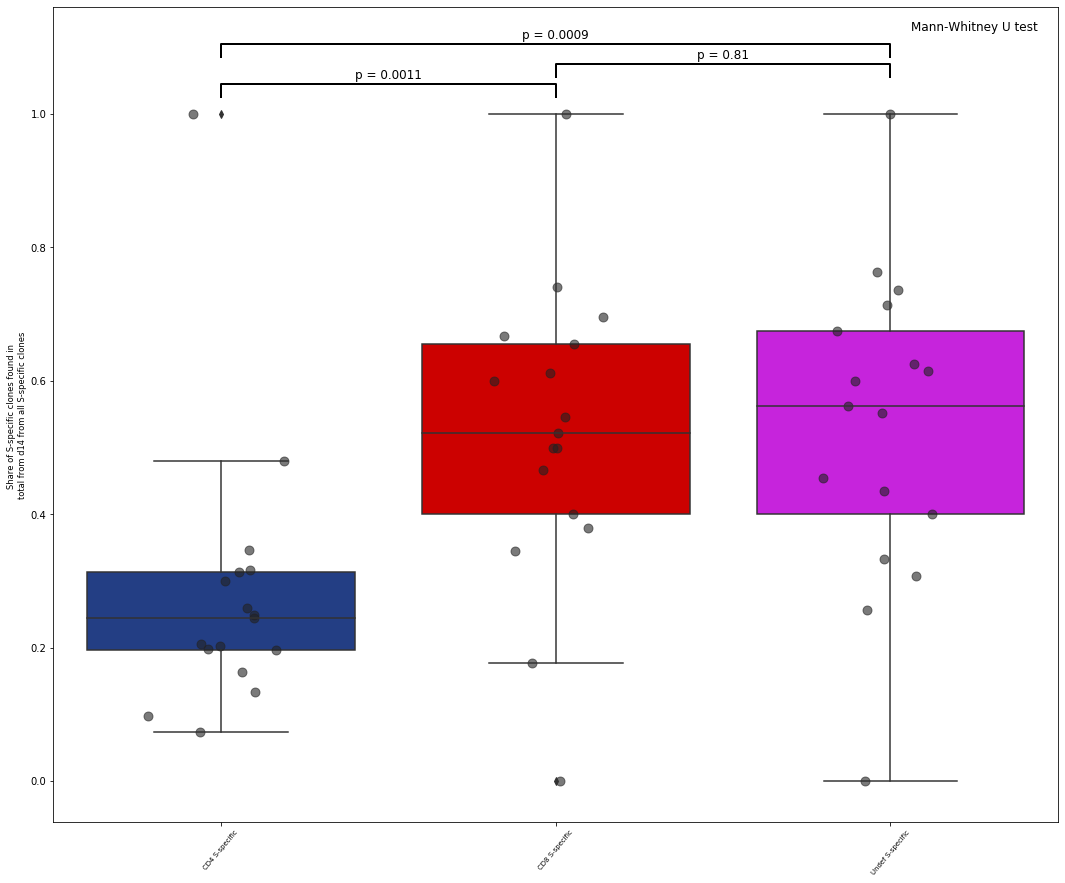

In [64]:
#Plot percentage found
path_all = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/'


plt.figure()
plt.rcParams["figure.figsize"] = (18,15)

summary_clones_in_d14_to_plot_not_0 = summary_clones_in_d14_to_plot
ax = sns.boxplot(x="cd", y="percent_found_in_d14", data=summary_clones_in_d14_to_plot_not_0, palette=pallet_wells, 
                 saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Share of S-specific clones found in \ntotal from d14 from all S-specific clones',fontsize='small')
ax.set_xlabel('')

#CD4
x = np.random.normal(0, 0.1, size=len(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]))
plt.scatter(x, 
summary_clones_in_d14_to_plot_not_0[(summary_clones_in_d14_to_plot_not_0['cd']=='CD4 S-specific')]['percent_found_in_d14'], c='#222222', alpha=0.6, s=80)

#CD8
x = np.random.normal(1, 0.1, size=len(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]))
plt.scatter(x, 
summary_clones_in_d14_to_plot_not_0[(summary_clones_in_d14_to_plot_not_0['cd']=='CD8 S-specific')]['percent_found_in_d14'], c='#222222', alpha=0.6, s=80)

#Undef
x = np.random.normal(2, 0.1, size=len(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='Undef S-specific')]))
plt.scatter(x, 
summary_clones_in_d14_to_plot_not_0[(summary_clones_in_d14_to_plot_not_0['cd']=='Undef S-specific')]['percent_found_in_d14'], c='#222222', alpha=0.6, s=80)


#CD4 CD8
y, h, col = summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['percent_found_in_d14'].max() + 0.025, 0.02, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c=col)
plt.text(0.5, y+h+0.003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['percent_found_in_d14']), 
                    list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]['percent_found_in_d14']))[1],
                                       4)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD8 Undef
y, h, col = summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['percent_found_in_d14'].max() + 0.055, 0.02, 'k'
plt.plot([1, 1, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(1.5, y+h+0.003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='Undef S-specific')]['percent_found_in_d14']), 
                    list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]['percent_found_in_d14']))[1],
                                       2)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD4 Undef
y, h, col = summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['percent_found_in_d14'].max() + 0.085, 0.02, 'k'
plt.plot([0, 0, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(1, y+h+0.0031, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='Undef S-specific')]['percent_found_in_d14']), 
                    list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['percent_found_in_d14']))[1],
                                       4)),
         ha='center', va='bottom', color=col, fontsize=12)

plt.text(2.25, 1.12, "Mann-Whitney U test",
         ha='center', va='bottom', color=col, fontsize=12)

path_to_png = path_all+'2I/2I(share_found_in_d14).png'
plt.savefig(path_to_png,bbox_inches='tight', dpi=450)
plt.show()


#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_clones_in_d14_to_plot['cd'].unique()):
    for y in list(summary_clones_in_d14_to_plot['cd'].unique()):
        if x!=y:
            pval = mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']==x)]['percent_found_in_d14']), 
                            list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']==y)]['percent_found_in_d14']))[1]
            new_row = {'X': x, 'Y':y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = path_all+'2I/pval(share_found_in_d14).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)



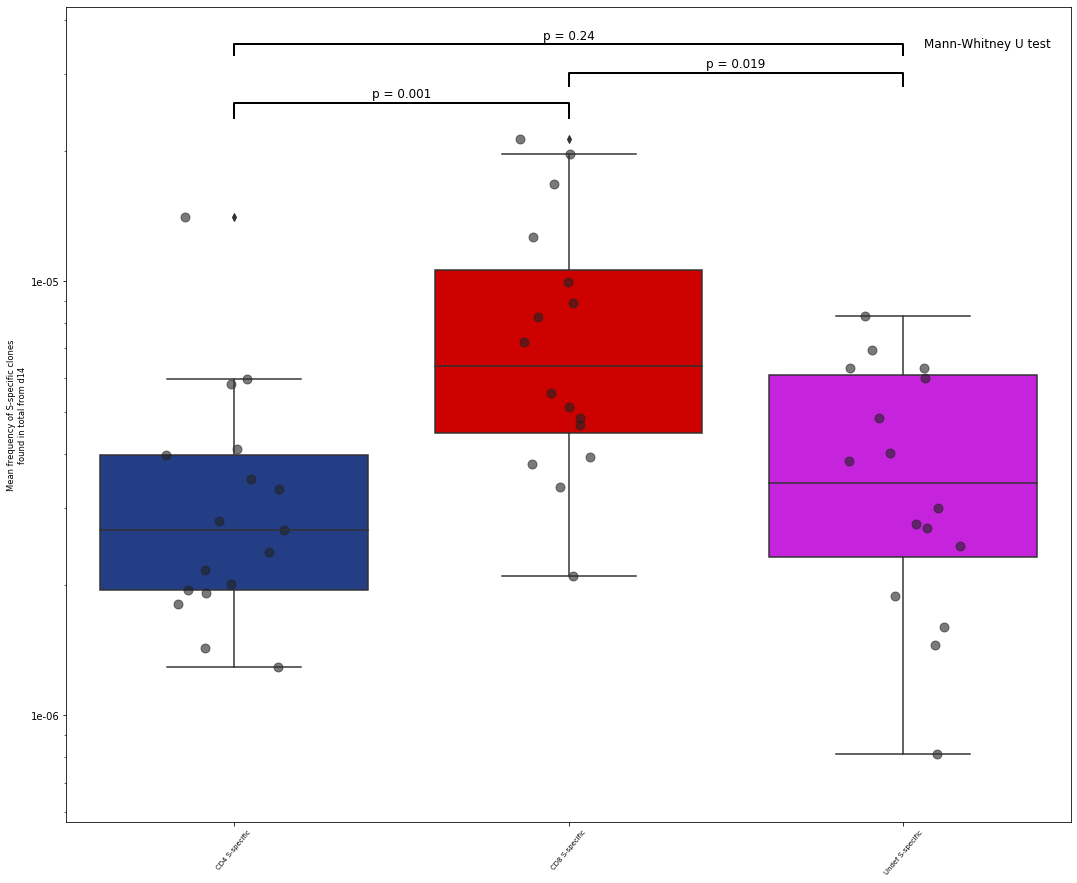

In [65]:
#Plot mean freq in d14
path_all = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/'

plt.figure()
plt.rcParams["figure.figsize"] = (18,15)
summary_clones_in_d14_to_plot_not_0 = summary_clones_in_d14_to_plot.replace(0, 1e-07)
ax = sns.boxplot(x="cd", y="mean_clone_size_found_in_d14", data=summary_clones_in_d14_to_plot_not_0, palette=pallet_wells, 
                 saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Mean frequency of S-specific clones\nfound in total from d14',fontsize='small')
ax.set_xlabel('')

#CD4
x = np.random.normal(0, 0.1, size=len(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]))
plt.scatter(x, 
summary_clones_in_d14_to_plot_not_0[(summary_clones_in_d14_to_plot_not_0['cd']=='CD4 S-specific')]['mean_clone_size_found_in_d14'], c='#222222', alpha=0.6, s=80)

#CD8
x = np.random.normal(1, 0.1, size=len(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]))
plt.scatter(x, 
summary_clones_in_d14_to_plot_not_0[(summary_clones_in_d14_to_plot_not_0['cd']=='CD8 S-specific')]['mean_clone_size_found_in_d14'], c='#222222', alpha=0.6, s=80)

#Undef
x = np.random.normal(2, 0.1, size=len(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='Undef S-specific')]))
plt.scatter(x, 
summary_clones_in_d14_to_plot_not_0[(summary_clones_in_d14_to_plot_not_0['cd']=='Undef S-specific')]['mean_clone_size_found_in_d14'], c='#222222', alpha=0.6, s=80)


#CD4 CD8
y, h, col = summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]['mean_clone_size_found_in_d14'].max() + 0.000025, 0.00002, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c=col)
plt.text(0.5, y+h+0.000003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['mean_clone_size_found_in_d14']), 
                    list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]['mean_clone_size_found_in_d14']))[1],
                                       3)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD8 Undef
y, h, col = summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]['mean_clone_size_found_in_d14'].max() + 0.00007, 0.00002, 'k'
plt.plot([1, 1, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(1.5, y+h+0.000003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='Undef S-specific')]['mean_clone_size_found_in_d14']), 
                    list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]['mean_clone_size_found_in_d14']))[1],
                                       3)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD4 Undef
y, h, col = summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD8 S-specific')]['mean_clone_size_found_in_d14'].max() + 0.00012, 0.00002, 'k'
plt.plot([0, 0, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(1, y+h+0.0000031, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='Undef S-specific')]['mean_clone_size_found_in_d14']), 
                    list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']=='CD4 S-specific')]['mean_clone_size_found_in_d14']))[1],
                                       2)),
         ha='center', va='bottom', color=col, fontsize=12)

plt.text(2.25, 0.00034, "Mann-Whitney U test",
         ha='center', va='bottom', color=col, fontsize=12)

ax.set_yscale('log')
labels = ['1e-08', '0', '1e-06', '1e-05', '1e-04']
ax.set_yticklabels(labels)

path_to_png = path_all+'2I/2I(mean_freq_in_d14).png'
plt.savefig(path_to_png,bbox_inches='tight', dpi=450)

plt.show()

#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_clones_in_d14_to_plot['cd'].unique()):
    for y in list(summary_clones_in_d14_to_plot['cd'].unique()):
        if x!=y:
            pval = mann_whitney_u_test(list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']==x)]['mean_clone_size_found_in_d14']), 
                            list(summary_clones_in_d14_to_plot[(summary_clones_in_d14_to_plot['cd']==y)]['mean_clone_size_found_in_d14']))[1]
            new_row = {'X': x, 'Y':y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = path_all+'2I/pval(mean_freq_in_d14).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)




## S2D

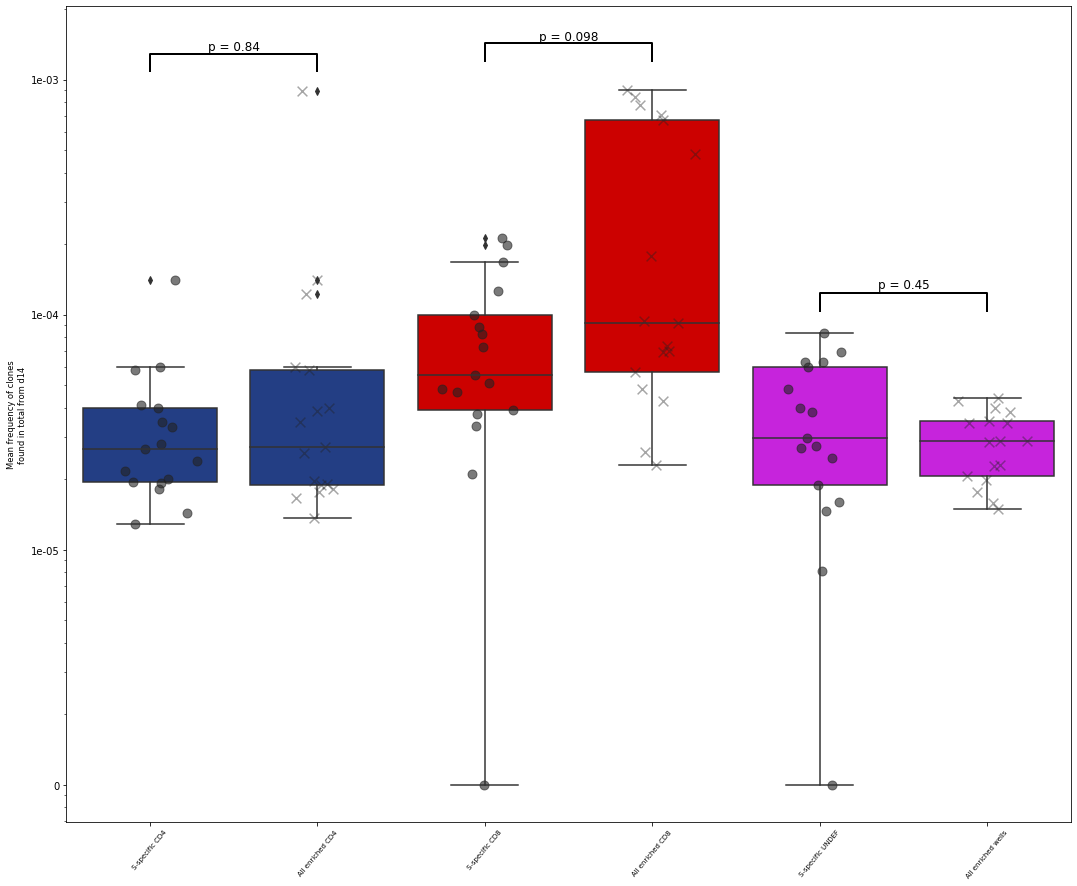

In [66]:
path_all = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/'
total_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'
cd_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/cd48_threshold_3/nc.vdj.'
well_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.p'

empty_df = pd.DataFrame(columns=['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j', 'VEnd', 'DStart',
       'DEnd', 'JStart'])

summary_clones_in_d0_d14 = pd.DataFrame()

s_specific_files = glob.glob(path_all + 'clones_from_venn/*/*.txt')
s_specific_files_venn = [x for x in s_specific_files if 'single' not in x]
patients = list(set([x.split('/')[-2] for x in s_specific_files]))
#patients = patients[:1]
for patient in patients:    
    patients_files = [x for x in s_specific_files_venn if patient in x]
    
    d0_path = total_path + patient + '_total_PBMC_day_0_clonotypes.txt'
    d0 = pd.read_csv(d0_path, delimiter='\t')
    d0_w_factor = make_factor_nt_d14(d0, 'd0')
    
    d14_path = total_path + patient + '_total_PBMC_day_14_clonotypes.txt'
    d14 = pd.read_csv(d14_path, delimiter='\t')
    d14_w_factor = make_factor_nt_d14(d14, 'd14')
    
    #patients_files = patients_files[2:3]
    for patient_file_path in patients_files:
        path_to_with_totals = '/'.join(patient_file_path.split('/')[:-1]) + '/with_totals/'
        os.makedirs(path_to_with_totals, exist_ok = True)
        
        cd_table = pd.read_csv(patient_file_path, delimiter='\t')
        cd_type = patient_file_path.split('/')[-1].split('.')[0]
        
        cd_and_total_d14 = cd_table.merge(d14_w_factor, on='cdr3', how='left').fillna(0)
        cd_and_total_d0 = cd_table.merge(d0_w_factor, on='cdr3', how='left').fillna(0)
        
        if (cd_type == 'cd4')|(cd_type == 'cd8'):
            all_cd_file_path = cd_path + patient + '-' + cd_type + '_beta.clonotypes.TRB.txt'
            all_cd_file = pd.read_csv(all_cd_file_path, delimiter='\t')
            all_cd_file = make_factor_nt_d14(all_cd_file, cd_type).loc[:, ['cdr3']]
            
            patient_file_cd_not_enr_path = [x for x in s_specific_files if (patient in x)&('single' in x)&(cd_type in x)]
        
        elif cd_type == 'undef':
            all_well_file_path_1 = well_path + patient + '_Spike_exp_puls_well_1_clonotypes.txt'
            all_well1_file = pd.read_csv(all_well_file_path_1, delimiter='\t')
            all_well1_file = make_factor_nt_d14(all_well1_file, 'well').loc[:, ['cdr3']]
            
            all_well_file_path_2 = well_path + patient + '_Spike_exp_puls_well_2_clonotypes.txt'
            try:
                all_well2_file = pd.read_csv(all_well_file_path_2, delimiter='\t')
                all_well2_file = make_factor_nt_d14(all_well2_file,'well').loc[:, ['cdr3']]
            except:
                all_well2_file = pd.DataFrame(columns=['cdr3'])
            
            all_cd_file = all_well1_file.merge(all_well2_file, how='outer', on='cdr3')
            
            patient_file_cd_not_enr_path = [x for x in s_specific_files if (patient in x)&('single' in x)&('well' in x)]
            
            
        if len(patient_file_cd_not_enr_path)>1:
            print(patient,cd_type)
        elif len(patient_file_cd_not_enr_path)==1:
            patient_file_cd_not_enr = pd.read_csv(patient_file_cd_not_enr_path[0], delimiter='\t')
            all_enr_clones = cd_table.append(patient_file_cd_not_enr)
            
            enr_and_total_d14 = all_enr_clones.merge(d14_w_factor, on='cdr3', how='left').fillna(0)
            enr_and_total_d0 = all_enr_clones.merge(d0_w_factor, on='cdr3', how='left').fillna(0)
            
            all_cd_and_total_d14 = all_cd_file.merge(d14_w_factor, on='cdr3', how='left').fillna(0)
            all_cd_and_total_d0 = all_cd_file.merge(d0_w_factor, on='cdr3', how='left').fillna(0)
        
        num_all_clones = len(cd_table)
        
        if num_all_clones != 0:
            percent_found_in_d14 = len(cd_and_total_d14[cd_and_total_d14['freq_d14']!=0])/len(cd_table)
            percent_found_in_d0 = len(cd_and_total_d0[cd_and_total_d0['freq_d0']!=0])/len(cd_table)
        else:
            percent_found_in_d14 = 0
            percent_found_in_d0 = 0
            
        new_row = {'patient': patient, 'day': 'd14', 'type_clones': 'S-specific '+cd_type.upper(), 'num_all_clones': num_all_clones, 
                   'num_clones_in_total': len(cd_and_total_d14[cd_and_total_d14['freq_d14']!=0]),
                    'percent_found_in_total': percent_found_in_d14,
                  'sum_freq_found_in_total': cd_and_total_d14[cd_and_total_d14['freq_d14']!=0]['freq_d14'].sum(),
                  'mean_clone_size_found_in_total': cd_and_total_d14[cd_and_total_d14['freq_d14']!=0]['freq_d14'].mean()}
        summary_clones_in_d0_d14 = summary_clones_in_d0_d14.append(new_row, ignore_index=True)
        
        new_row = {'patient': patient, 'day': 'd14', 'type_clones': 'All enriched '+cd_type.upper(), 'num_all_clones': len(all_enr_clones), 
                   'num_clones_in_total': len(enr_and_total_d14[enr_and_total_d14['freq_d14']!=0]),
                    'percent_found_in_total': len(enr_and_total_d14[enr_and_total_d14['freq_d14']!=0])/(len(all_enr_clones)),
                  'sum_freq_found_in_total': enr_and_total_d14[enr_and_total_d14['freq_d14']!=0]['freq_d14'].sum(),
                  'mean_clone_size_found_in_total': enr_and_total_d14[enr_and_total_d14['freq_d14']!=0]['freq_d14'].mean()}
        summary_clones_in_d0_d14 = summary_clones_in_d0_d14.append(new_row, ignore_index=True)
        
        new_row = {'patient': patient, 'day': 'd14', 'type_clones': 'All '+cd_type.upper()+' from sequencing', 'num_all_clones': len(all_cd_file), 
                   'num_clones_in_total': len(all_cd_and_total_d14[all_cd_and_total_d14['freq_d14']!=0]),
                    'percent_found_in_total': len(all_cd_and_total_d14[all_cd_and_total_d14['freq_d14']!=0])/(len(all_cd_file)),
                  'sum_freq_found_in_total': all_cd_and_total_d14[all_cd_and_total_d14['freq_d14']!=0]['freq_d14'].sum(),
                  'mean_clone_size_found_in_total': all_cd_and_total_d14[all_cd_and_total_d14['freq_d14']!=0]['freq_d14'].mean()}
        summary_clones_in_d0_d14 = summary_clones_in_d0_d14.append(new_row, ignore_index=True)
        
        
        new_row = {'patient': patient, 'day': 'd0', 'type_clones': 'S-specific '+cd_type.upper(), 'num_all_clones': num_all_clones, 
                   'num_clones_in_total': len(cd_and_total_d0[cd_and_total_d0['freq_d0']!=0]),
                    'percent_found_in_total': percent_found_in_d0,
                  'sum_freq_found_in_total': cd_and_total_d0[cd_and_total_d0['freq_d0']!=0]['freq_d0'].sum(),
                  'mean_clone_size_found_in_total': cd_and_total_d0[cd_and_total_d0['freq_d0']!=0]['freq_d0'].mean()}
        summary_clones_in_d0_d14 = summary_clones_in_d0_d14.append(new_row, ignore_index=True)
        
        new_row = {'patient': patient, 'day': 'd0', 'type_clones': 'All enriched '+cd_type.upper(), 'num_all_clones': len(all_enr_clones), 
                   'num_clones_in_total': len(enr_and_total_d0[enr_and_total_d0['freq_d0']!=0]),
                    'percent_found_in_total': len(enr_and_total_d0[enr_and_total_d0['freq_d0']!=0])/(len(all_enr_clones)),
                  'sum_freq_found_in_total': enr_and_total_d0[enr_and_total_d0['freq_d0']!=0]['freq_d0'].sum(),
                  'mean_clone_size_found_in_total': enr_and_total_d0[enr_and_total_d0['freq_d0']!=0]['freq_d0'].mean()}
        summary_clones_in_d0_d14 = summary_clones_in_d0_d14.append(new_row, ignore_index=True)
        
        new_row = {'patient': patient, 'day': 'd0', 'type_clones': 'All '+cd_type.upper()+' from sequencing', 'num_all_clones': len(all_cd_file), 
                   'num_clones_in_total': len(all_cd_and_total_d0[all_cd_and_total_d0['freq_d0']!=0]),
                    'percent_found_in_total': len(all_cd_and_total_d0[all_cd_and_total_d0['freq_d0']!=0])/(len(all_cd_file)),
                  'sum_freq_found_in_total': all_cd_and_total_d0[all_cd_and_total_d0['freq_d0']!=0]['freq_d0'].sum(),
                  'mean_clone_size_found_in_total': all_cd_and_total_d0[all_cd_and_total_d0['freq_d0']!=0]['freq_d0'].mean()}
        summary_clones_in_d0_d14 = summary_clones_in_d0_d14.append(new_row, ignore_index=True)
        
summary_clones_in_d0_d14_path = path_all + 'clones_from_venn/summary_s_specific_and_enr_and_all_found_in_d0_and_d14_total.txt'
summary_clones_in_d0_d14.to_csv(summary_clones_in_d0_d14_path, sep='\t', index=False)
summary_clones_in_d0_d14_path = path_all + 'S2D/summary_s_specific_and_enr_and_all_found_in_d0_and_d14_total.txt'
summary_clones_in_d0_d14.to_csv(summary_clones_in_d0_d14_path, sep='\t', index=False)

#Plot mean_clone_size
summary_clones_in_d0 = summary_clones_in_d0_d14[(summary_clones_in_d0_d14['day']=='d14')&((summary_clones_in_d0_d14['type_clones']!='All CD4 from sequencing')&(summary_clones_in_d0_d14['type_clones']!='All CD8 from sequencing')&(summary_clones_in_d0_d14['type_clones']!='All UNDEF from sequencing'))]

summary_clones_in_d0_to_plot = summary_clones_in_d0.copy()
summary_clones_in_d0_to_plot = summary_clones_in_d0_to_plot.fillna(0)

summary_clones_in_d0_to_plot = summary_clones_in_d0_to_plot.replace({'All enriched UNDEF': 'All enriched wells'})

box_order = CategoricalDtype(
    ['S-specific CD4', 'All enriched CD4',
     'S-specific CD8', 'All enriched CD8', #'All CD8 from sequencing',
     'S-specific UNDEF', 'All enriched wells'], #'All wells from sequencing'], 
    ordered=True
)
summary_clones_in_d0_to_plot['type_clones'] = summary_clones_in_d0_to_plot['type_clones'].astype(box_order)
summary_clones_in_d0_to_plot = summary_clones_in_d0_to_plot.sort_values('type_clones')


pallet_wells = ['#233e84', '#233e84', '#cc0100','#cc0100', '#C624DC', '#C624DC']

plt.figure()
plt.rcParams["figure.figsize"] = (18,15)


summary_clones_in_d0_to_plot_not_0 = summary_clones_in_d0_to_plot.replace(0, 1e-06)
ax = sns.boxplot(x="type_clones", y="mean_clone_size_found_in_total", data=summary_clones_in_d0_to_plot_not_0, palette=pallet_wells, 
                 saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Mean frequency of clones\nfound in total from d14',fontsize='small')
ax.set_xlabel('')


#CD4
x = np.random.normal(0, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD4')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD4')]['mean_clone_size_found_in_total'], c='#222222', alpha=0.6, s=80)

x = np.random.normal(1, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD4')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD4')]['mean_clone_size_found_in_total'], 
            marker ='x', c='#222222', alpha=0.4, s=95)

y, h, col = summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD4')]['mean_clone_size_found_in_total'].max() + 0.0002, 0.0002, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c=col)
plt.text(0.5, y+h+0.000003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD4')]['mean_clone_size_found_in_total']), 
                    list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD4')]['mean_clone_size_found_in_total']))[1],
                                       2)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD8
x = np.random.normal(2, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD8')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD8')]['mean_clone_size_found_in_total'], c='#222222', alpha=0.6, s=80)

x = np.random.normal(3, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD8')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD8')]['mean_clone_size_found_in_total'], 
            marker ='x', c='#222222', alpha=0.4, s=95)

y, h, col = summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD8')]['mean_clone_size_found_in_total'].max() + 0.00029, 0.00023, 'k'
plt.plot([2, 2, 3, 3], [y, y+h, y+h, y], lw=2, c=col)
plt.text(2.5, y+h+0.000003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD8')]['mean_clone_size_found_in_total']), 
                    list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD8')]['mean_clone_size_found_in_total']))[1],
                                       3)),
         ha='center', va='bottom', color=col, fontsize=12)

#Undef
x = np.random.normal(4, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific UNDEF')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific UNDEF')]['mean_clone_size_found_in_total'], c='#222222', alpha=0.6, s=80)

x = np.random.normal(5, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched wells')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched wells')]['mean_clone_size_found_in_total'], c='#222222', 
            marker ='x', alpha=0.4, s=95)

y, h, col = summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific UNDEF')]['mean_clone_size_found_in_total'].max() + 0.00002, 0.00002, 'k'
plt.plot([4, 4, 5, 5], [y, y+h, y+h, y], lw=2, c=col)
plt.text(4.5, y+h+0.000003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific UNDEF')]['mean_clone_size_found_in_total']), 
                    list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched wells')]['mean_clone_size_found_in_total']))[1],
                                       2)),
         ha='center', va='bottom', color=col, fontsize=12)


ax.set_yscale('log')

labels = ['1e-08', '1e-07', '0', '1e-05', '1e-04','1e-03', '1e-02']
ax.set_yticklabels(labels)

path_to_png = path_all + 'S2D/S2D(mean_freq_in_d14).png'
plt.savefig(path_to_png,bbox_inches='tight', dpi=450)
plt.show()

#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_clones_in_d0_to_plot_not_0['type_clones'].unique()):
    for y in list(summary_clones_in_d0_to_plot_not_0['type_clones'].unique()):
        if x!=y:
            pval = mann_whitney_u_test(list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']==x)]['mean_clone_size_found_in_total']), 
                            list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']==y)]['mean_clone_size_found_in_total']))[1]
            new_row = {'X': x, 'Y':y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = path_all+'S2D/pval(mean_freq_in_d14).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)


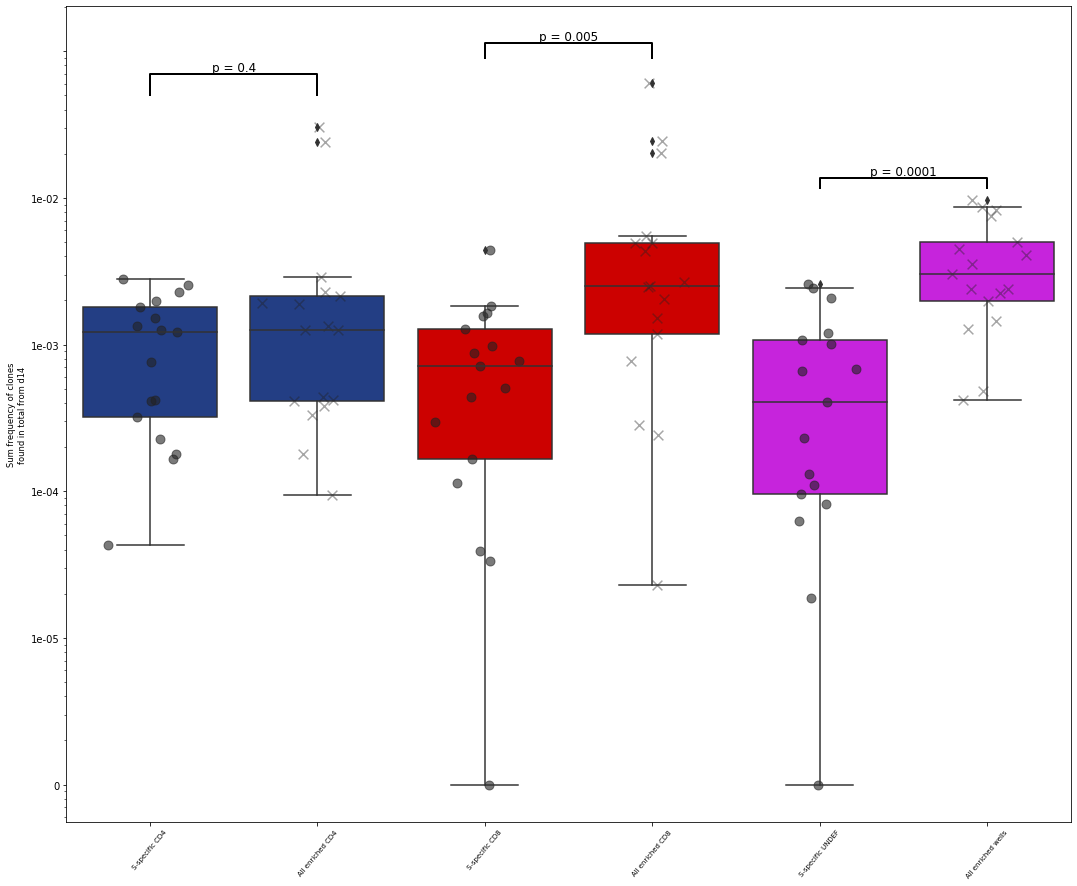

In [67]:
#Plot sum freq
path_all = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/'

plt.figure()
plt.rcParams["figure.figsize"] = (18,15)


summary_clones_in_d0_to_plot_not_0 = summary_clones_in_d0_to_plot.replace(0, 1e-06)
ax = sns.boxplot(x="type_clones", y="sum_freq_found_in_total", data=summary_clones_in_d0_to_plot_not_0, palette=pallet_wells, 
                 saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Sum frequency of clones\nfound in total from d14',fontsize='small')
ax.set_xlabel('')


#CD4
x = np.random.normal(0, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD4')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD4')]['sum_freq_found_in_total'], c='#222222', alpha=0.6, s=80)

x = np.random.normal(1, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD4')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD4')]['sum_freq_found_in_total'], 
            marker ='x', c='#222222', alpha=0.4, s=95)

y, h, col = summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD4')]['sum_freq_found_in_total'].max() + 0.02, 0.02, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c=col)
plt.text(0.5, y+h+0.000003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD4')]['sum_freq_found_in_total']), 
                    list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD4')]['sum_freq_found_in_total']))[1],
                                       1)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD8
x = np.random.normal(2, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD8')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD8')]['sum_freq_found_in_total'], c='#222222', alpha=0.6, s=80)

x = np.random.normal(3, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD8')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD8')]['sum_freq_found_in_total'], 
            marker ='x', c='#222222', alpha=0.4, s=95)

y, h, col = summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD8')]['sum_freq_found_in_total'].max() + 0.029, 0.023, 'k'
plt.plot([2, 2, 3, 3], [y, y+h, y+h, y], lw=2, c=col)
plt.text(2.5, y+h+0.000003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific CD8')]['sum_freq_found_in_total']), 
                    list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched CD8')]['sum_freq_found_in_total']))[1],
                                       3)),
         ha='center', va='bottom', color=col, fontsize=12)

#Undef
x = np.random.normal(4, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific UNDEF')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific UNDEF')]['sum_freq_found_in_total'], c='#222222', alpha=0.6, s=80)

x = np.random.normal(5, 0.1, size=len(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched wells')]))
plt.scatter(x, 
summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched wells')]['sum_freq_found_in_total'], c='#222222', 
            marker ='x', alpha=0.4, s=95)

y, h, col = summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched wells')]['sum_freq_found_in_total'].max() + 0.002, 0.002, 'k'
plt.plot([4, 4, 5, 5], [y, y+h, y+h, y], lw=2, c=col)
plt.text(4.5, y+h+0.000003, 'p = '+str(round(mann_whitney_u_test(list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='S-specific UNDEF')]['sum_freq_found_in_total']), 
                    list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']=='All enriched wells')]['sum_freq_found_in_total']))[1],
                                       5)),
         ha='center', va='bottom', color=col, fontsize=12)

ax.set_yscale('log')

labels = ['1e-08', '1e-07', '0', '1e-05', '1e-04','1e-03', '1e-02']
ax.set_yticklabels(labels)

path_to_png = path_all+'S2D/S2D(sum_freq_in_d14).png'
plt.savefig(path_to_png,bbox_inches='tight', dpi=450)

plt.show()

#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_clones_in_d0_to_plot_not_0['type_clones'].unique()):
    for y in list(summary_clones_in_d0_to_plot_not_0['type_clones'].unique()):
        if x!=y:
            pval = mann_whitney_u_test(list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']==x)]['sum_freq_found_in_total']), 
                            list(summary_clones_in_d0_to_plot_not_0[(summary_clones_in_d0_to_plot_not_0['type_clones']==y)]['sum_freq_found_in_total']))[1]
            new_row = {'X': x, 'Y':y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = path_all+'S2D/pval(sum_freq_in_d14).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)



## 2SE

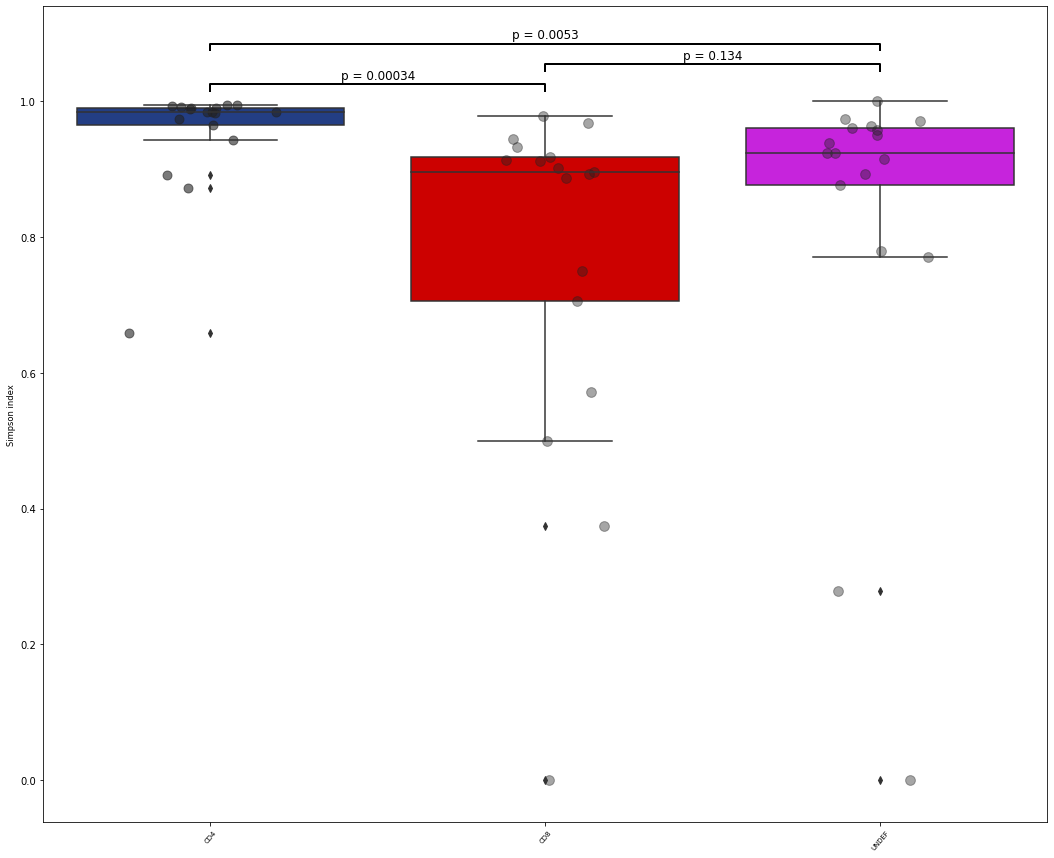

In [69]:

#Shannon and simpson
patients = list(summary_clones_in_d0_to_plot_not_0['patient'].unique())

#patients = ['1752']
shannon_simson_table = pd.DataFrame()

path_all_s_spec = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/clones_from_venn/'
path_all_cd_seq = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/cd48_threshold_3/nc.vdj.'
path_all_wells = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.p'


for patient in patients:
    path_s_spec = path_all_s_spec + patient + '/'
    cd4_s = pd.read_csv(path_s_spec+'cd4.txt', delimiter='\t')
    cd8_s = pd.read_csv(path_s_spec+'cd8.txt', delimiter='\t')
    undef_s = pd.read_csv(path_s_spec+'undef.txt', delimiter='\t')
    
    cd4_path = path_all_cd_seq + patient + '-cd4_beta.clonotypes.TRB.txt'
    cd4 = pd.read_csv(cd4_path, delimiter='\t')
    cd4 = make_factor_nt_d14(cd4, '')
    
    cd8_path = path_all_cd_seq + patient + '-cd8_beta.clonotypes.TRB.txt'
    cd8 = pd.read_csv(cd8_path, delimiter ='\t')
    cd8 = make_factor_nt_d14(cd8, '')
    
    
    all_well_file_path_1 = path_all_wells + patient + '_Spike_exp_puls_well_1_clonotypes.txt'
    all_well1_file = pd.read_csv(all_well_file_path_1, delimiter='\t')
    all_well1_file = make_factor_nt_d14(all_well1_file, 'w1')

    all_well_file_path_2 = path_all_wells + patient + '_Spike_exp_puls_well_2_clonotypes.txt'
    try:
        all_well2_file = pd.read_csv(all_well_file_path_2, delimiter='\t')
        all_well2_file = make_factor_nt_d14(all_well2_file,'w2')
        undef = all_well1_file.merge(all_well2_file, how='outer', on='cdr3').fillna(0)
        undef['freq_'] = undef['freq_w1'] + undef['freq_w2']
    
    except:
        undef = all_well1_file.rename(columns={'freq_w1':'freq_'})
    
    
    cd4_s = cd4_s.merge(cd4, how='left', on='cdr3')
    cd8_s = cd8_s.merge(cd8, how='left', on='cdr3')
    undef_s = undef_s.merge(undef, how='left', on='cdr3')
    
    new_row = {'patient': patient, 'index': 'Shannon', 'Clones type': 'all', 'CD': 'CD8', 
        'value': skbio.diversity.alpha.shannon(list(cd8['freq_']), base=2)}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    new_row = {'patient': patient, 'index': 'Shannon', 'Clones type': 'all', 'CD': 'CD4', 
        'value': skbio.diversity.alpha.shannon(list(cd4['freq_']), base=2)}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    new_row = {'patient': patient, 'index': 'Shannon', 'Clones type': 'all', 'CD': 'UNDEF', 
        'value': skbio.diversity.alpha.shannon(list(undef['freq_']), base=2)}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    
    new_row = {'patient': patient, 'index': 'Shannon', 'Clones type': 'S-specific', 'CD': 'CD8', 
        'value': skbio.diversity.alpha.shannon(list(cd8_s['freq_']), base=2)}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    new_row = {'patient': patient, 'index': 'Shannon', 'Clones type': 'S-specific', 'CD': 'CD4', 
        'value': skbio.diversity.alpha.shannon(list(cd4_s['freq_']), base=2)}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    new_row = {'patient': patient, 'index': 'Shannon', 'Clones type': 'S-specific', 'CD': 'UNDEF', 
        'value': skbio.diversity.alpha.shannon(list(undef_s['freq_']), base=2)}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    
    
    new_row = {'patient': patient, 'index': 'Simson', 'Clones type': 'all', 'CD': 'CD8', 
        'value': skbio.diversity.alpha.simpson(list(cd8['freq_']))}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    new_row = {'patient': patient, 'index': 'Simson', 'Clones type': 'all', 'CD': 'CD4', 
        'value': skbio.diversity.alpha.simpson(list(cd4['freq_']))}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    new_row = {'patient': patient, 'index': 'Simson', 'Clones type': 'all', 'CD': 'UNDEF', 
        'value': skbio.diversity.alpha.simpson(list(undef['freq_']))}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    
    new_row = {'patient': patient, 'index': 'Simson', 'Clones type': 'S-specific', 'CD': 'CD8', 
        'value': skbio.diversity.alpha.simpson(list(cd8_s['freq_']))}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    new_row = {'patient': patient, 'index': 'Simson', 'Clones type': 'S-specific', 'CD': 'CD4', 
        'value': skbio.diversity.alpha.simpson(list(cd4_s['freq_']))}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    new_row = {'patient': patient, 'index': 'Simson', 'Clones type': 'S-specific', 'CD': 'UNDEF', 
        'value': skbio.diversity.alpha.simpson(list(undef_s['freq_']))}
    shannon_simson_table = shannon_simson_table.append(new_row, ignore_index=True)
    
    
shannon_simson_table_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/S2E/diverity_index.txt'
shannon_simson_table.to_csv(shannon_simson_table_path, sep='\t', index=False)

# Plot
shannon_simson_table_plot = shannon_simson_table.copy()

shannon_simson_table_plot = shannon_simson_table_plot[(shannon_simson_table_plot['index']=='Simson')&(shannon_simson_table_plot['Clones type']=='S-specific')]

box_order = CategoricalDtype(
    ['CD4', 'CD8', 'UNDEF'],
    ordered=True
)
shannon_simson_table_plot['CD'] = shannon_simson_table_plot['CD'].astype(box_order)
shannon_simson_table_plot = shannon_simson_table_plot.sort_values('CD')


pallet_wells = ['#233e84', '#cc0100', '#C624DC']

plt.figure()
plt.rcParams["figure.figsize"] = (18,15)

ax = sns.boxplot(x="CD", y="value", data=shannon_simson_table_plot, palette=pallet_wells, 
                 saturation=1)
plt.xticks(rotation=50,fontsize='x-small')
ax.set_ylabel('Simpson index', fontsize='small')
ax.set_xlabel('')


x = np.random.normal(0, 0.1, size=len(shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD4')]))
plt.scatter(x, 
shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD4')]['value'], c='#222222', alpha=0.6, s=80)

x = np.random.normal(1, 0.1, size=len(shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD8')]))
plt.scatter(x, 
shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD8')]['value'], c='#222222', alpha=0.4, s=95)

x = np.random.normal(2, 0.1, size=len(shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='UNDEF')]))
plt.scatter(x, 
shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='UNDEF')]['value'], c='#222222', alpha=0.4, s=95)

#CD4 CD8
y, h, col = shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD4')]['value'].max() + 0.02, 0.01, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c=col)
plt.text(0.5, y+h+0.003, 'p = '+str(round(mann_whitney_u_test(list(shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD4')]['value']), 
                    list(shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD8')]['value']))[1],
                                       5)),
         ha='center', va='bottom', color=col, fontsize=12)

#undef CD8
y, h, col = shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD4')]['value'].max() + 0.05, 0.01, 'k'
plt.plot([1, 1, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(1.5, y+h+0.003, 'p = '+str(round(mann_whitney_u_test(list(shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='UNDEF')]['value']), 
                    list(shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD8')]['value']))[1],
                                       3)),
         ha='center', va='bottom', color=col, fontsize=12)

#CD4 undef
y, h, col = shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD4')]['value'].max() + 0.08, 0.01, 'k'
plt.plot([0, 0, 2, 2], [y, y+h, y+h, y], lw=2, c=col)
plt.text(1, y+h+0.003, 'p = '+str(round(mann_whitney_u_test(list(shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='CD4')]['value']), 
                    list(shannon_simson_table_plot[(shannon_simson_table_plot['CD']=='UNDEF')]['value']))[1],
                                       4)),
         ha='center', va='bottom', color=col, fontsize=12)


path_to_png = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/S2E/S2E(simpson).png'
plt.savefig(path_to_png,bbox_inches='tight', dpi=450)

plt.show()

#Count statistics to table
statistics = pd.DataFrame()

for x in list(shannon_simson_table_plot['CD'].unique()):
    for y in list(shannon_simson_table_plot['CD'].unique()):
        if x!=y:
            pval = mann_whitney_u_test(list(shannon_simson_table_plot[(shannon_simson_table_plot['CD']==x)]['value']), 
                            list(shannon_simson_table_plot[(shannon_simson_table_plot['CD']==y)]['value']))[1]
            new_row = {'X': x, 'Y':y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = path_all+'S2E/pval(simpson).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)


In [8]:
path_all = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/'
path_to_all_venn = glob.glob(path_all+'venns_tables/p*/venn_cdr3nt.txt')
summary_venn_results = pd.DataFrame()
#path_to_all_venn = path_to_all_venn[:1]
types=['Well1', 'Well2', 'CD8', 'CD4', 'CD8&Well1&Well2',
       'CD4&Well1&Well2', 'Well1&Well2', 'Well1&CD8', 'Well2&CD8',
       'CD4&Well1', 'CD4&Well2']
venn_summary = pd.DataFrame()
for venn_path in path_to_all_venn:
    venn = pd.read_csv(venn_path)
    dict_types = {}
    for type_venn in types:
        dict_types[type_venn] = len(venn[venn['type']==type_venn])
    dict_types['patient'] = venn_path.split('/')[-2]
    venn_summary = venn_summary.append(dict_types, ignore_index=True)
venn_summary.to_csv(path_all+'venn_summary.txt', sep='\t', index=False)
    

In [5]:
venn_path

'/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/venns_tables/p1800/venn_cdr3nt.txt'